In [35]:
#from google.colab import drive
#drive.mount('/content/drive')

# Import Libraries

In [36]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

print("sklearn:", __import__("sklearn").__version__)
try:
    import scikeras
    print("scikeras:", scikeras.__version__)
except Exception as e:
    print("SciKeras not found. Install with: !pip install scikeras")

sklearn: 1.6.1
SciKeras not found. Install with: !pip install scikeras


In [37]:

diamonds = pd.read_csv('/content/sample_data/diamonds.csv')

# Data Defining

In [38]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53943 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53943 non-null  int64  
 1   carat       53943 non-null  float64
 2   cut         53943 non-null  object 
 3   color       53943 non-null  object 
 4   clarity     53943 non-null  object 
 5   depth       53943 non-null  float64
 6   table       53943 non-null  float64
 7   price       53943 non-null  int64  
 8   x           53943 non-null  float64
 9   y           53943 non-null  float64
 10  z           53943 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [39]:
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [40]:
diamonds = diamonds.drop(['Unnamed: 0'],axis=1)

In [41]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [42]:
diamonds.isnull().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


In [43]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [44]:
diamonds.shape

(53943, 10)

## Show Categorical and Continuous Data

In [45]:
categorical_data = diamonds.select_dtypes(include=['object'])
continuous_data = diamonds.select_dtypes(include=['int64', 'float64'])

print("Categorical Data Columns:")
i=1
for cate_columns in categorical_data.columns:
  print(f"{i}. {cate_columns}")
  i+=1

print("\nContinuous Data Columns:")
i=1
for cont_columns in continuous_data.columns:
  print(f"{i}. {cont_columns}")
  i+=1

Categorical Data Columns:
1. cut
2. color
3. clarity

Continuous Data Columns:
1. carat
2. depth
3. table
4. price
5. x
6. y
7. z


# Understanding the Relationship and Preprocessing
Analyze the diamonds dataset by visualizing the distributions of numerical and categorical features, and the relationships between them.

## Pie Chart

In [46]:
# Function  ploting graph
def pie_chart(columnName, color = ['lightblue', 'lightpink']):
    plt.figure(figsize=(8, 6))
    pd_value_counts = diamonds[columnName].value_counts()

    # Create labels with both percentage and count
    labels = [f'{label}\n({count})' for label, count in zip(pd_value_counts.index, pd_value_counts.values)]

    plt.pie(pd_value_counts.values,
            labels=labels,
            autopct='%1.1f%%',
            colors= color)

    plt.title(columnName +' Distribution')
    plt.show()

def hist_graph(columnName, bins_custom = 10, alpha_custom = 0.7):
    plt.figure(figsize=(8, 5))
    counts, bins, patches = plt.hist(diamonds[columnName], bins=bins_custom, alpha=alpha_custom)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(patches)))
    for patch, color in zip(patches, colors):
        patch.set_facecolor(color)
    plt.title(columnName+' Distribution')
    plt.xlabel(columnName)
    plt.ylabel('Frequency')
    plt.show()

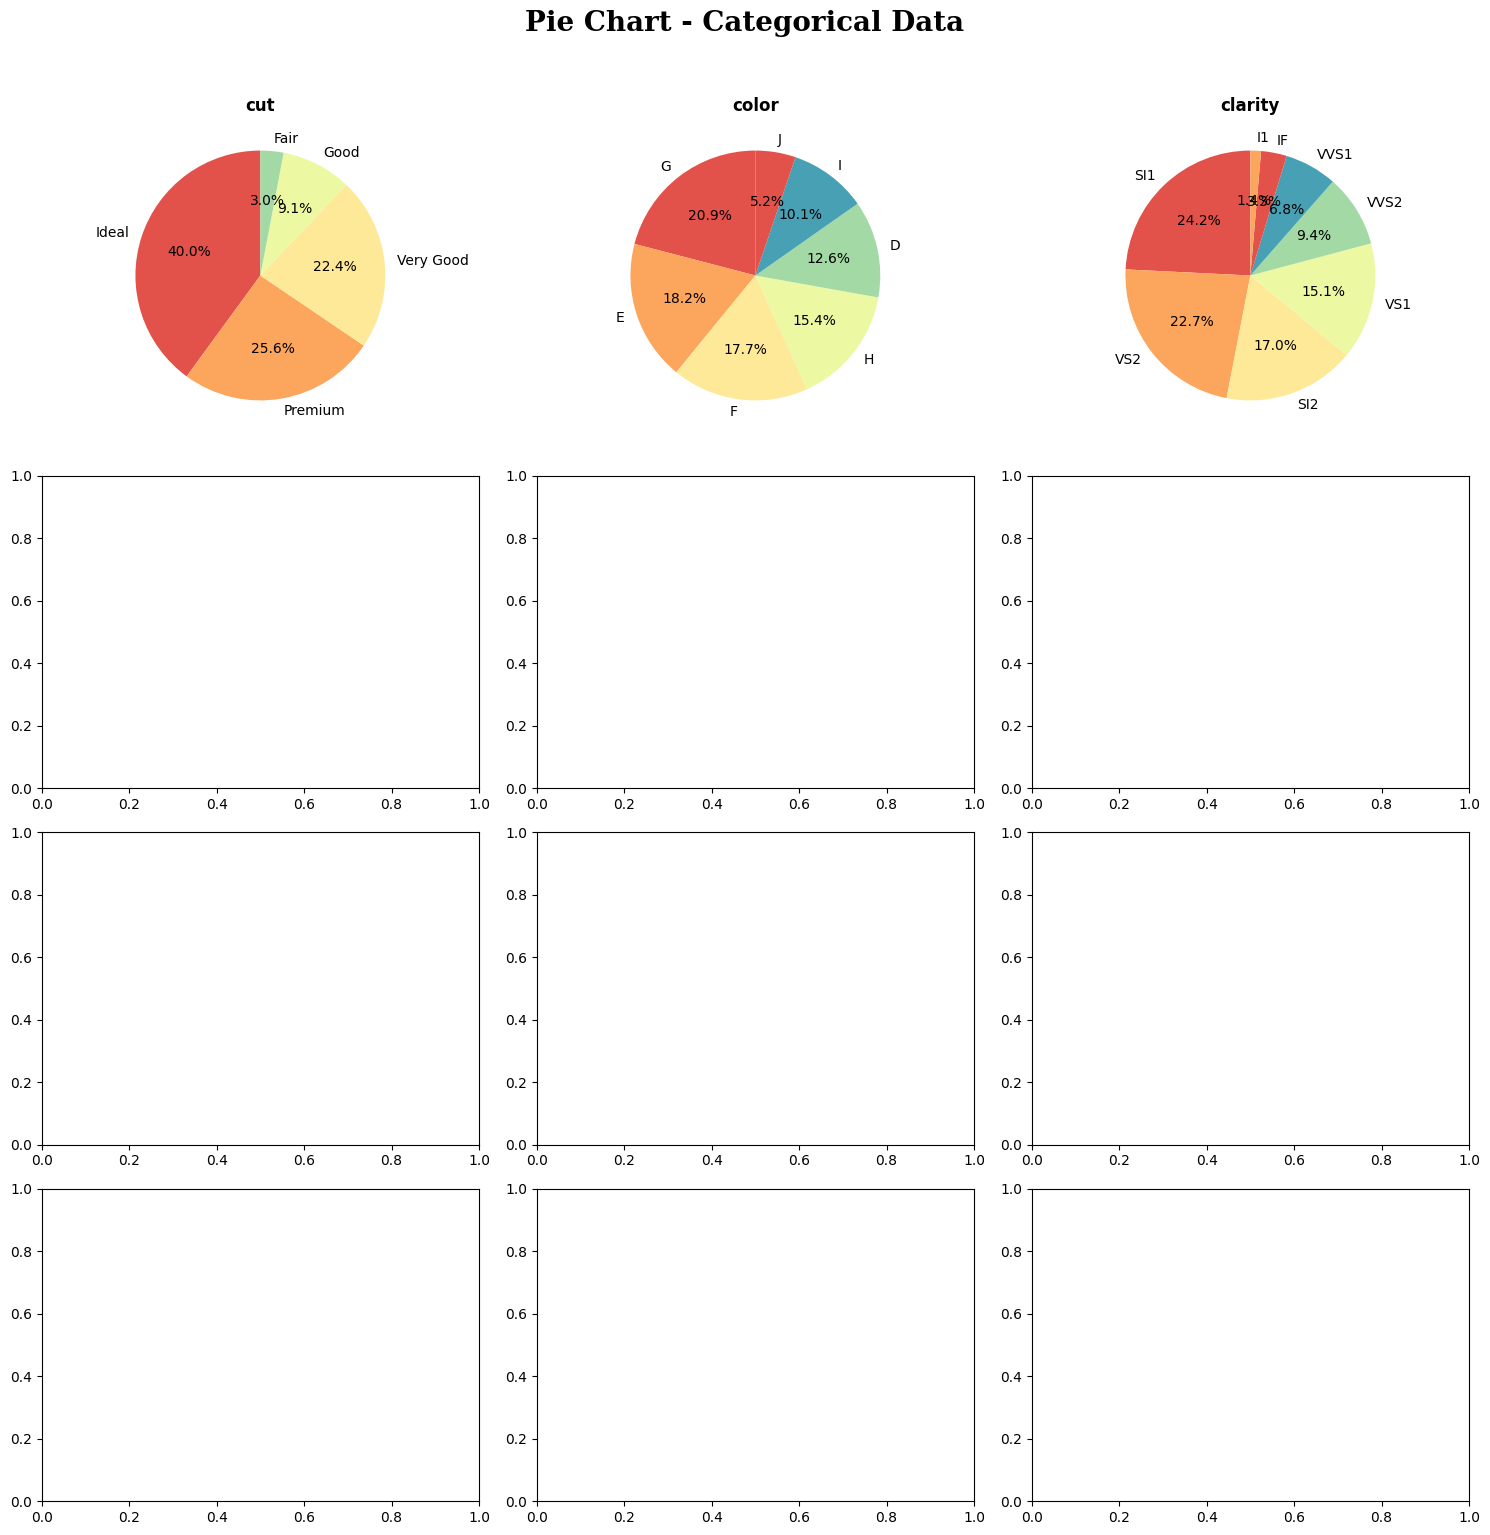

In [47]:
# Pie Chart
fig, axes = plt.subplots(4, 3, figsize=(15, 15))

axes = axes.flatten()

categorical_cols = ['cut', 'color', 'clarity']

for i, var in enumerate(categorical_cols):
  color_pallette = sns.color_palette('Spectral')
  counts = diamonds[var].value_counts()
  axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', colors=color_pallette, startangle=90)
  axes[i].set_title(var, fontweight='bold')

fig.suptitle(
    "Pie Chart - Categorical Data",
    fontsize=20,
    fontweight='bold',
    fontfamily='serif',
    y=1.02
)
plt.tight_layout()
plt.show()

## Bar Chart

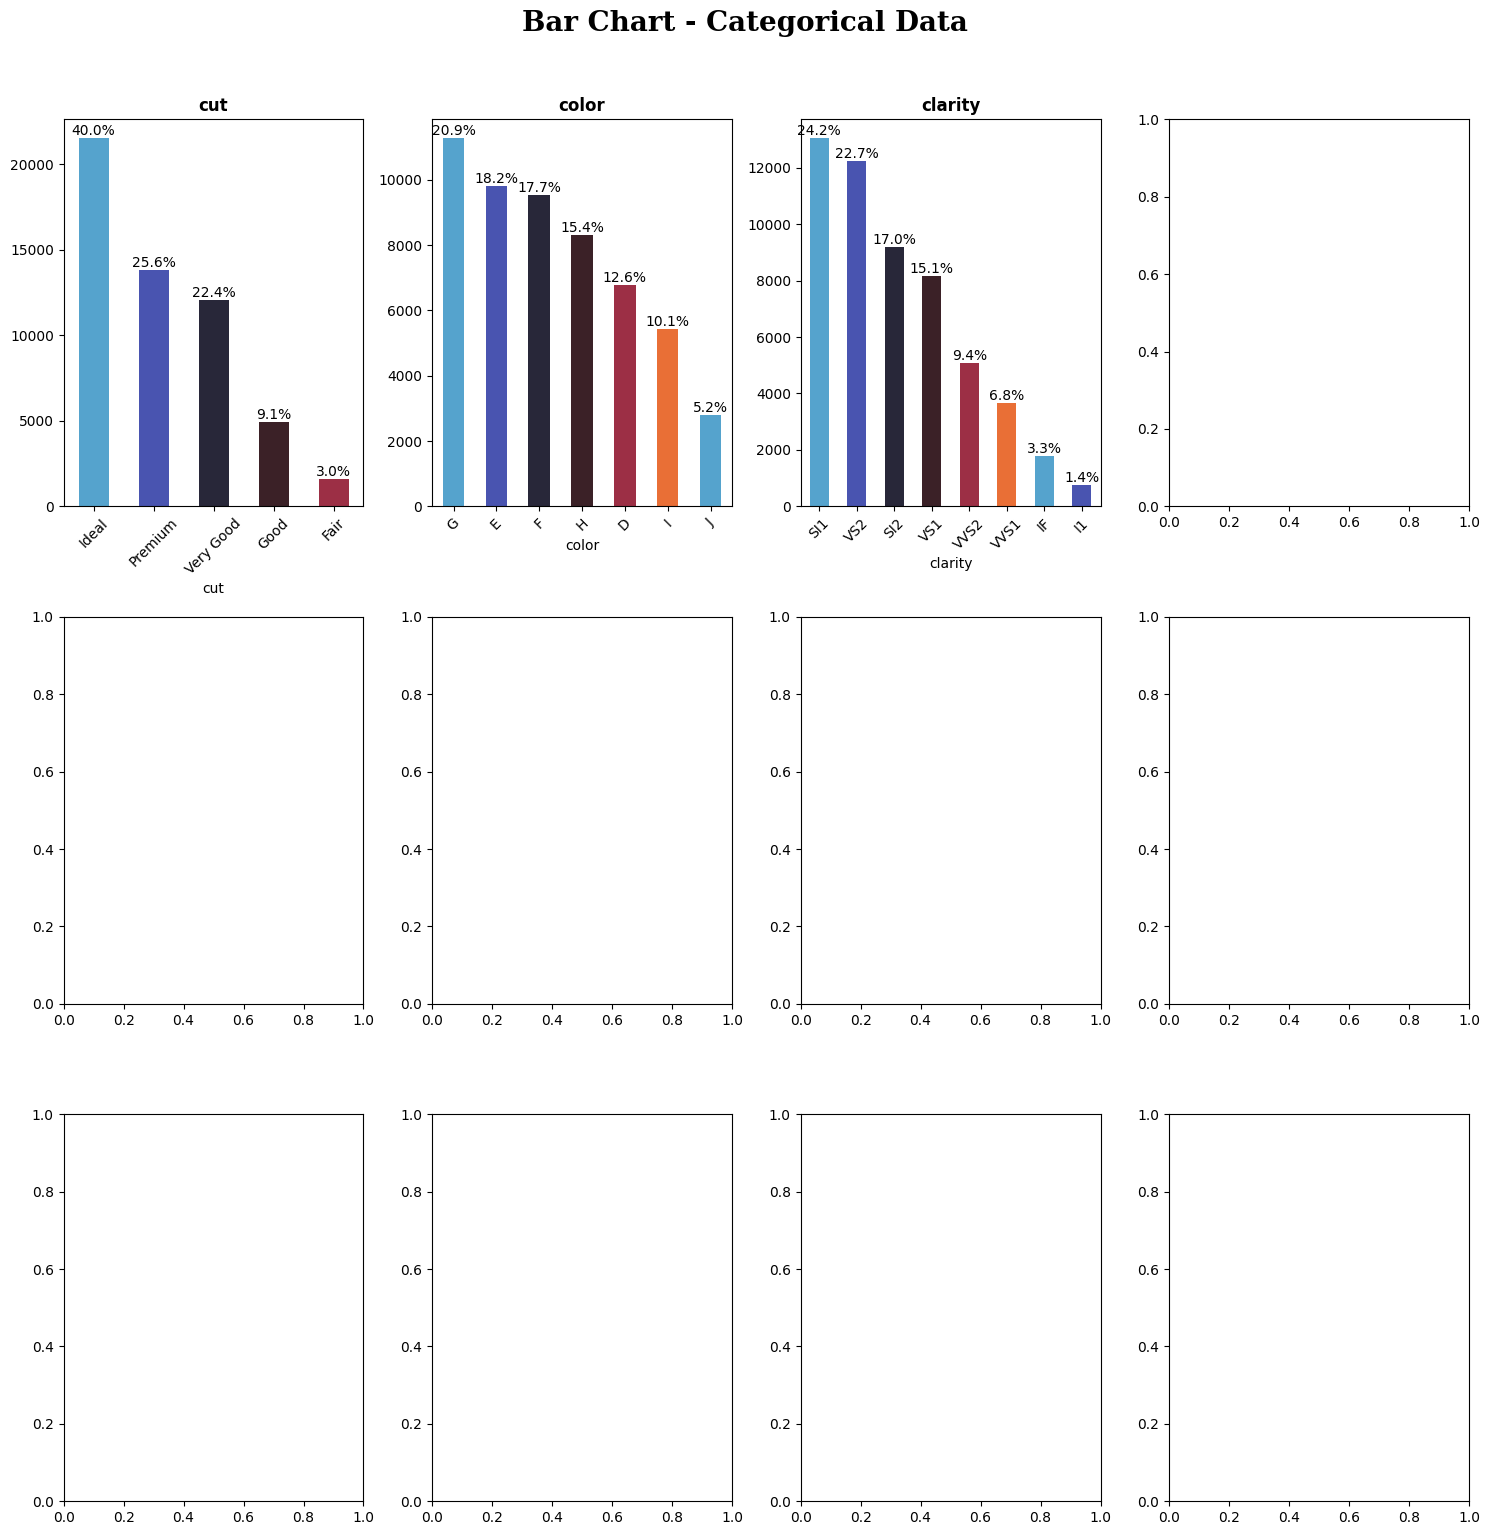

In [48]:
# Bar Chart with percenatage
fig, axs = plt.subplots(3, 4, figsize=(15, 15))
axs = axs.flatten()


color_pallette = sns.color_palette('icefire')

for i, column in enumerate(categorical_data.columns):
    value_counts = diamonds[column].value_counts()
    # Use a colormap to get different colors for bars
    ax = value_counts.plot(kind='bar', ax=axs[i], color=color_pallette)
    axs[i].set_title(column, fontweight='bold')
    axs[i].tick_params(axis='x', rotation=45) # Rotate labels for better readability


    # Add percentage labels on top of bars
    total = value_counts.sum()
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2.
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center', va='bottom')


    fig.suptitle(
        "Bar Chart - Categorical Data",
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        y=1.02
    )


plt.tight_layout()
plt.show()

## Histogram

# Check skewness

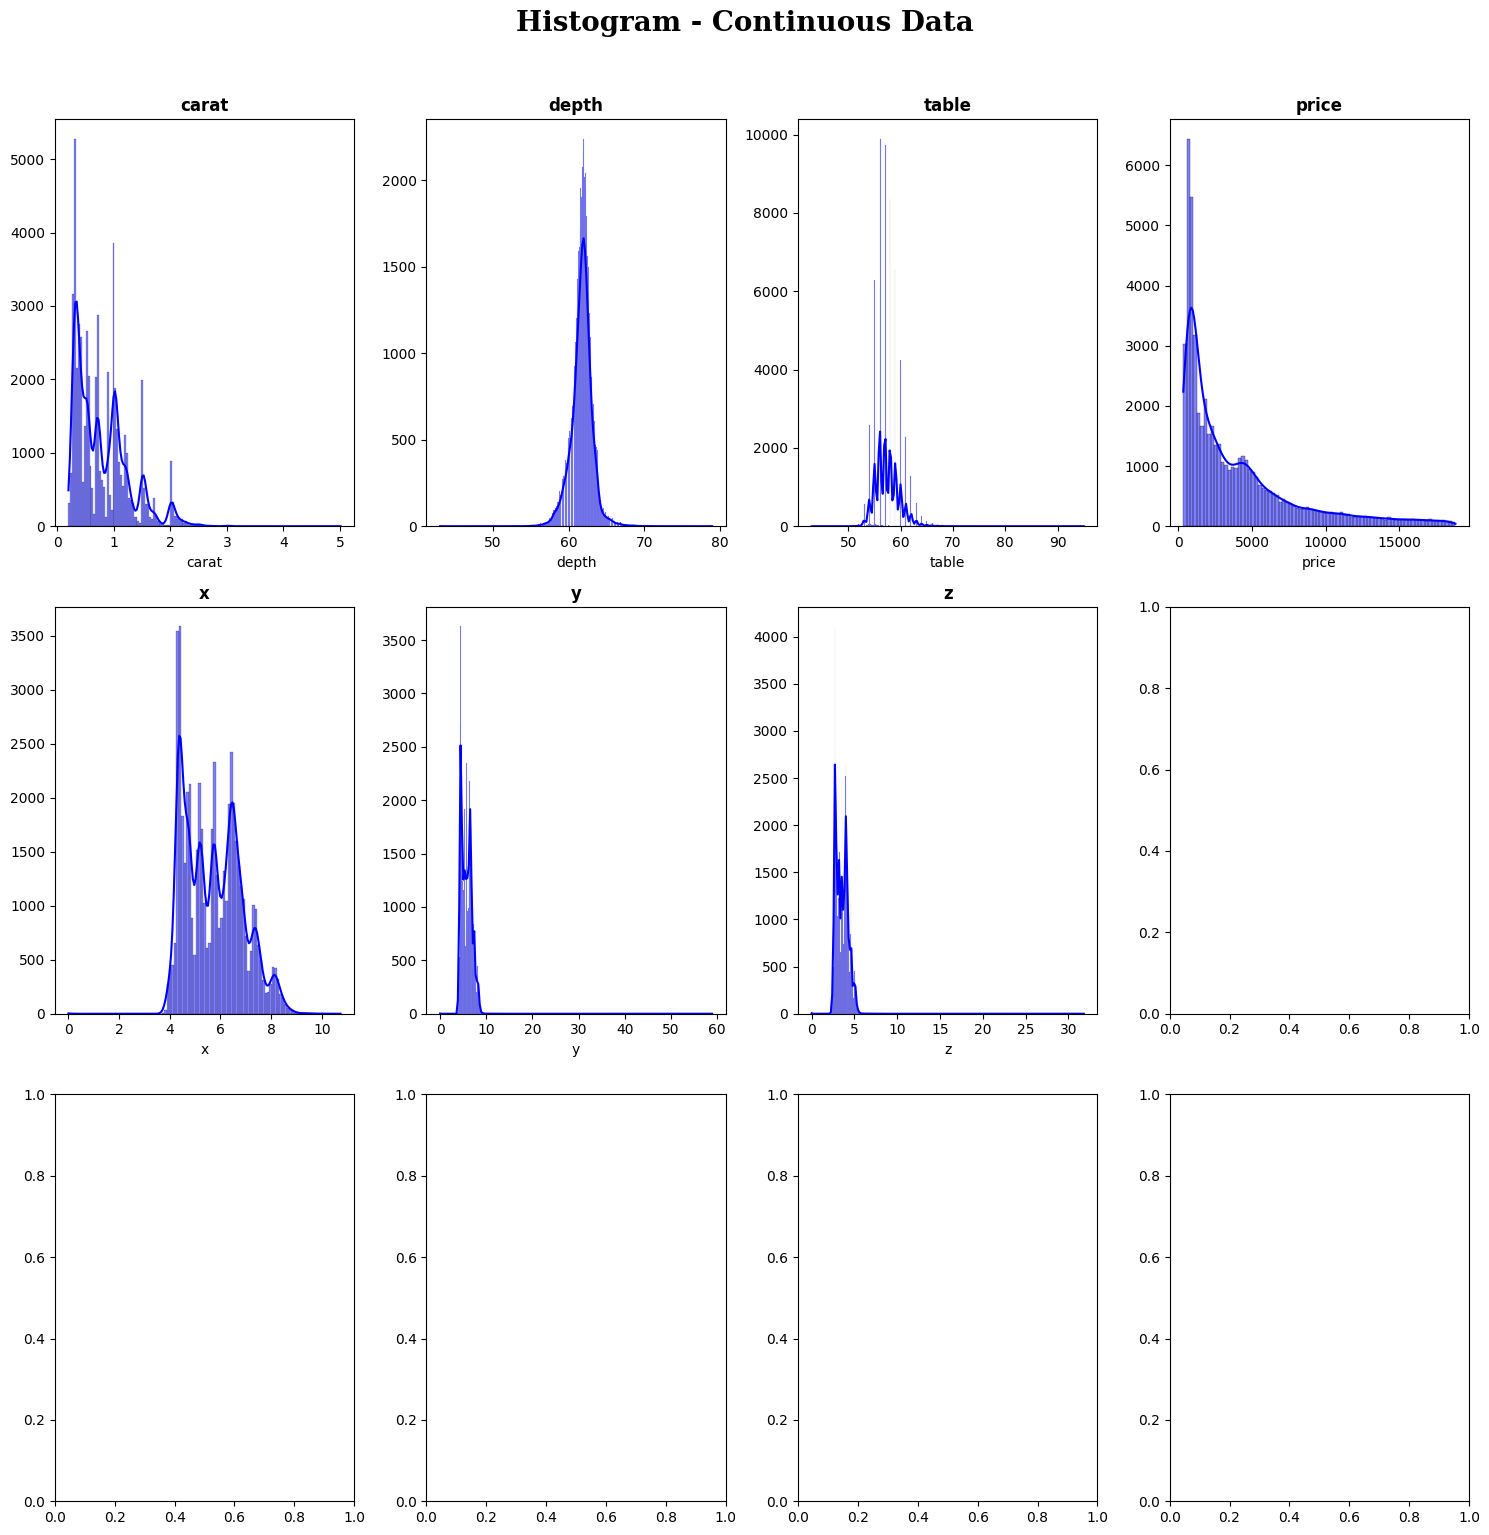

In [49]:
#Histogram
fig, axs = plt.subplots(3, 4, figsize=(15,15))
axs = axs.flatten()

for i, column in enumerate(continuous_data.columns):
    sns.histplot(data=diamonds, x=column, ax=axs[i], kde=True, color='blue')
    axs[i].set_title(column, fontweight='bold')
    axs[i].set_ylabel('')

    fig.suptitle(
        "Histogram - Continuous Data",
        fontsize=20,
        fontweight='bold',
        fontfamily='serif',
        y=1.02
    )

plt.tight_layout()
plt.show()

**Reasoning**:
Import necessary libraries and create histograms for the numerical columns to visualize their distributions.

**XYZ**
X, Y and Z shows some data have the value 0, which does not make sense. Means some data are missing value (not measured) or Invalid.

Carat: This distribution appears leptokurtic (heavy tails and a sharp peak).

Depth: This distribution appears mesokurtic (similar to a normal distribution).

Table: This distribution appears somewhat leptokurtic (peaked with heavier tails than a normal distribution).

Price: This distribution is highly leptokurtic (very sharp peak at the lower end and a long tail to the right).

x, y, and z: These distributions appear somewhat leptokurtic, showing peaks and some heavier tails.


## Graph and Chart Specification

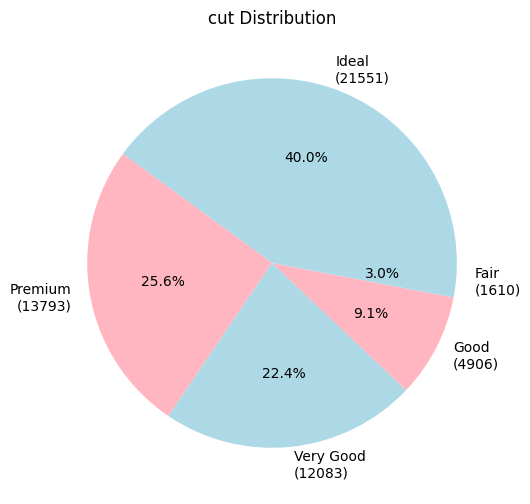

In [50]:
pie_chart(columnName= 'cut')

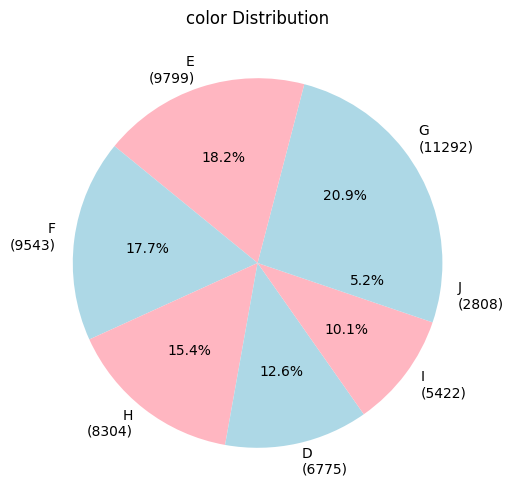

In [51]:
pie_chart(columnName= 'color')

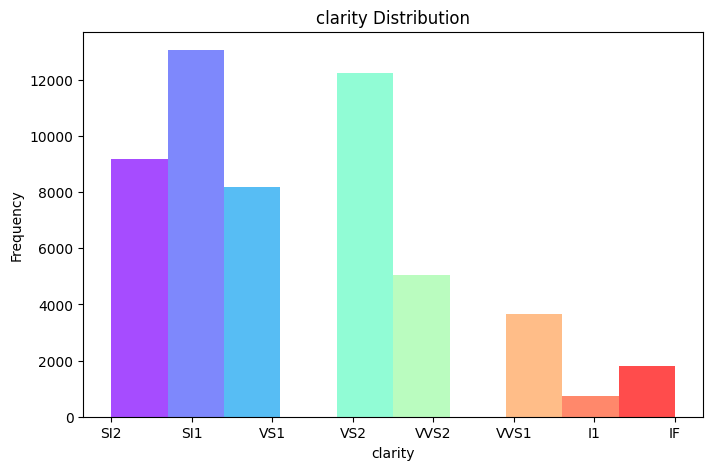

In [52]:
hist_graph(columnName='clarity')

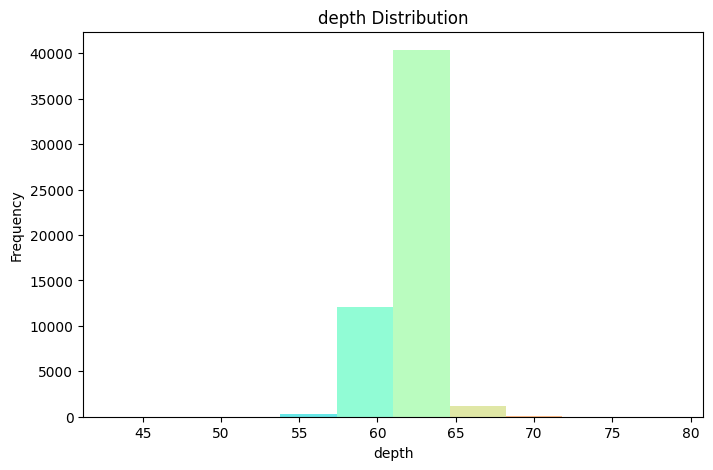

In [53]:
hist_graph(columnName='depth')

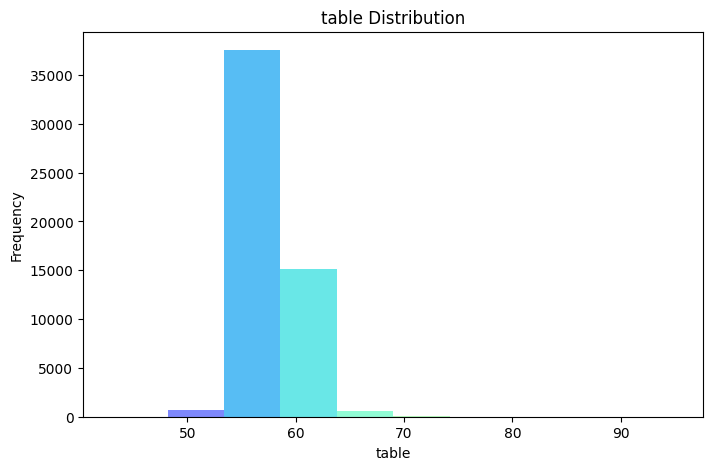

In [54]:
hist_graph(columnName='table')

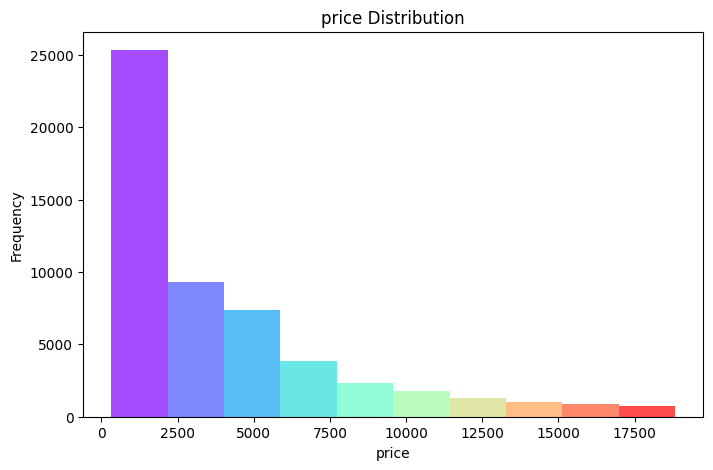

In [55]:
# Target
hist_graph(columnName='price')

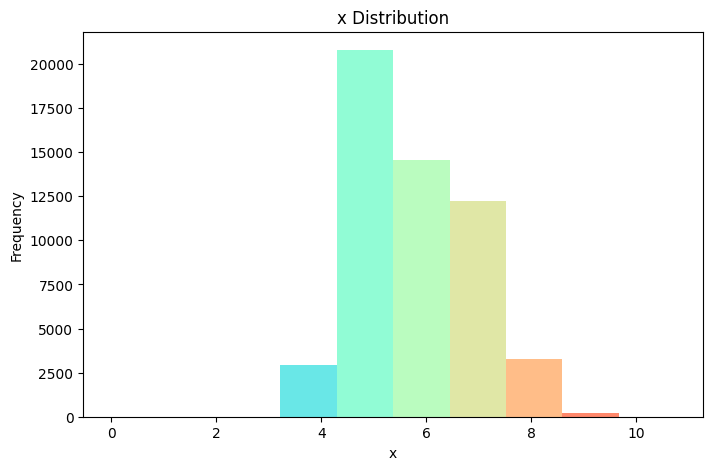

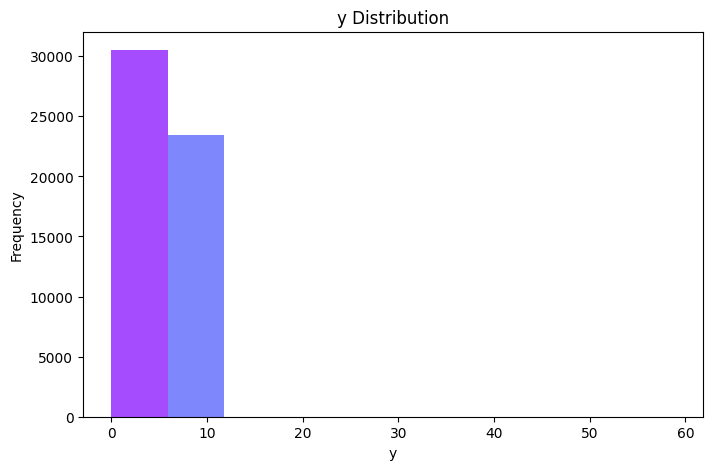

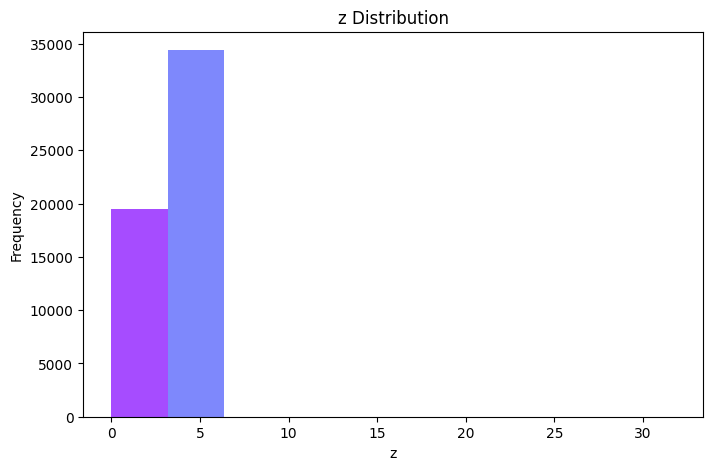

In [56]:
hist_graph(columnName='x')
hist_graph(columnName='y')
hist_graph(columnName='z')

# Data Preprocessing

## Clear Missing Values

In [57]:
print(diamonds.columns.tolist())

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z']


In [58]:
diamonds.isna().sum()

,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0
z,0


Remove 0 values

In [59]:
zero_values = diamonds[(diamonds['x'] == 0) | (diamonds['y'] == 0) | (diamonds['z'] == 0)]
display(zero_values)

,carat,cut,color,clarity,depth,table,price,x,y,z
2207,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


In [60]:
# Removes the records with 0 on xyz

diamonds = diamonds[(diamonds['x'] != 0) & (diamonds['y'] != 0) & (diamonds['z'] != 0)]
display(diamonds)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


Combine x, y, z to be volume

In [61]:
# volume
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


In [62]:
diamonds_volume_skewness=diamonds.volume.skew()
print(diamonds_volume_skewness)

3.0428011670057518


In [63]:
volume_kurtosis = diamonds.volume.kurtosis()
print(volume_kurtosis)

95.02338530755573


## IQR - Outlier

In [64]:
# Extract features
volume = diamonds['volume']
depth = diamonds['depth']
table = diamonds['table']

# Create dataframe from these values
data = pd.DataFrame({'volume': volume, 'depth': depth, 'table': table})

# Create a copy of the DataFrame for capping
capped_data = data.copy()

for col in data.columns:
    # Calculate IQR and whisker boundaries
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr

    # Identify outliers
    outliers = data[col][(data[col] < lower_whisker) | (data[col] > upper_whisker)]

    # Capping outliers
    capped_data[col] = data[col].clip(lower=lower_whisker, upper=upper_whisker)

    # Print stats
    print(f"--- Statistics for capped '{col}' ---")
    print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}")
    print(f"Lower Whisker: {lower_whisker}, Upper Whisker: {upper_whisker}")
    print(f"Number of Outliers before capping: {len(outliers)}")
    print(f"Min (capped): {capped_data[col].min():.2f}")
    print(f"Max (capped): {capped_data[col].max():.2f}")
    print(f"Mean (capped): {capped_data[col].mean():.2f}")
    print(f"Median (capped): {capped_data[col].median():.2f}")
    print()

# Update the original diamonds DataFrame with capped values
diamonds[['volume', 'depth', 'table']] = capped_data[['volume', 'depth', 'table']]


--- Statistics for capped 'volume' ---
Q1: 65.190168, Q3: 170.845492, IQR: 105.65532400000001
Lower Whisker: -93.29281800000001, Upper Whisker: 329.328478
Number of Outliers before capping: 1323
Min (capped): 31.71
Max (capped): 329.33
Mean (capped): 129.06
Median (capped): 114.84

--- Statistics for capped 'depth' ---
Q1: 61.0, Q3: 62.5, IQR: 1.5
Lower Whisker: 58.75, Upper Whisker: 64.75
Number of Outliers before capping: 2543
Min (capped): 58.75
Max (capped): 64.75
Mean (capped): 61.75
Median (capped): 61.80

--- Statistics for capped 'table' ---
Q1: 56.0, Q3: 59.0, IQR: 3.0
Lower Whisker: 51.5, Upper Whisker: 63.5
Number of Outliers before capping: 604
Min (capped): 51.50
Max (capped): 63.50
Mean (capped): 57.44
Median (capped): 57.00



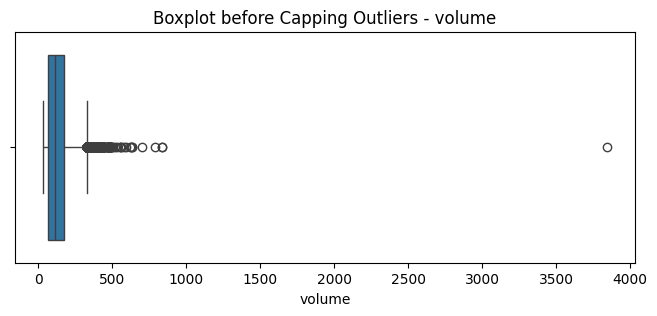

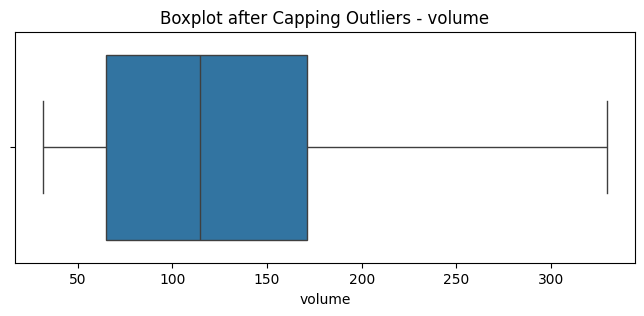

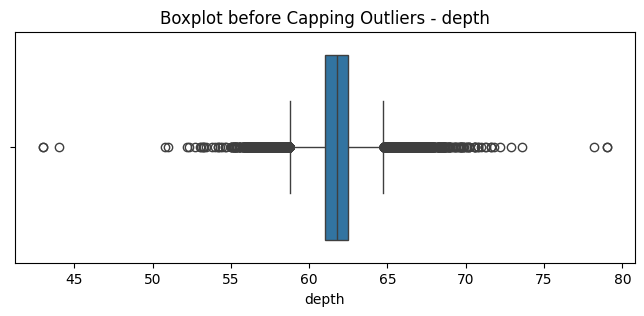

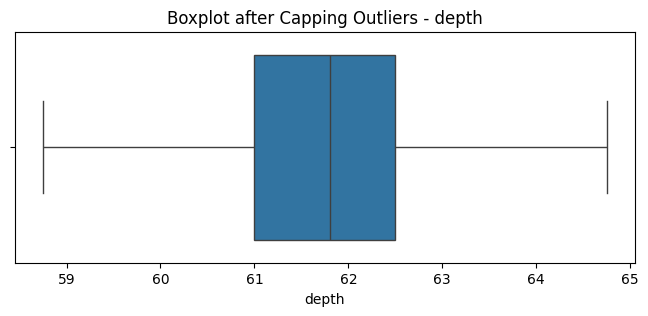

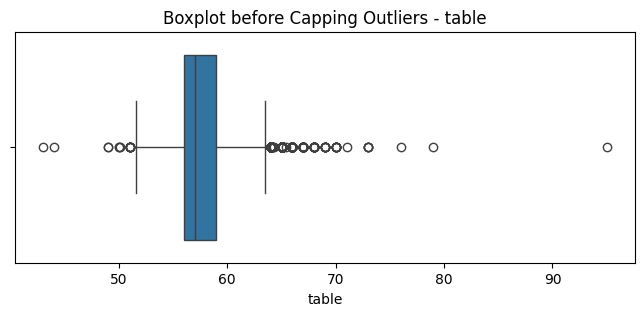

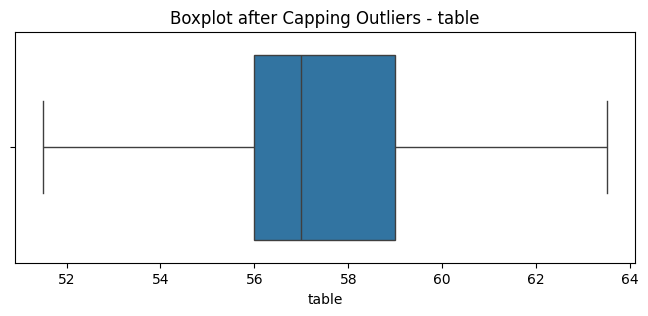

In [65]:
for col in data.columns:
    # Boxplot before capping
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot before Capping Outliers - {col}')
    plt.show()

    # Boxplot after capping
    plt.figure(figsize=(8, 3))
    sns.boxplot(x=capped_data[col])
    plt.title(f'Boxplot after Capping Outliers - {col}')
    plt.show()

## Check Unique Variables

In [66]:
for col in diamonds.columns:
  if diamonds[col].nunique() < 10:
    print(col, diamonds[col].unique())

# Define the correct order for each categorical variable (best to worst)
cut_order = ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']
color_order = ['D', 'E', 'F', 'G', 'H', 'I', 'J']  # D (colorless) is best, J (light color) is worst
clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']  # IF (flawless) is best, I1 (included) is worst

cut ['Ideal' 'Premium' 'Good' 'Very Good' 'Fair']
color ['E' 'I' 'J' 'H' 'F' 'G' 'D']
clarity ['SI2' 'SI1' 'VS1' 'VS2' 'VVS2' 'VVS1' 'I1' 'IF']


Since they are ordinal categorical variables, we need to use Label Encoding later on. Using one-hot encoding would treat each category as independent, losing the information about the ordered relationship between them, which is value in this dataset.

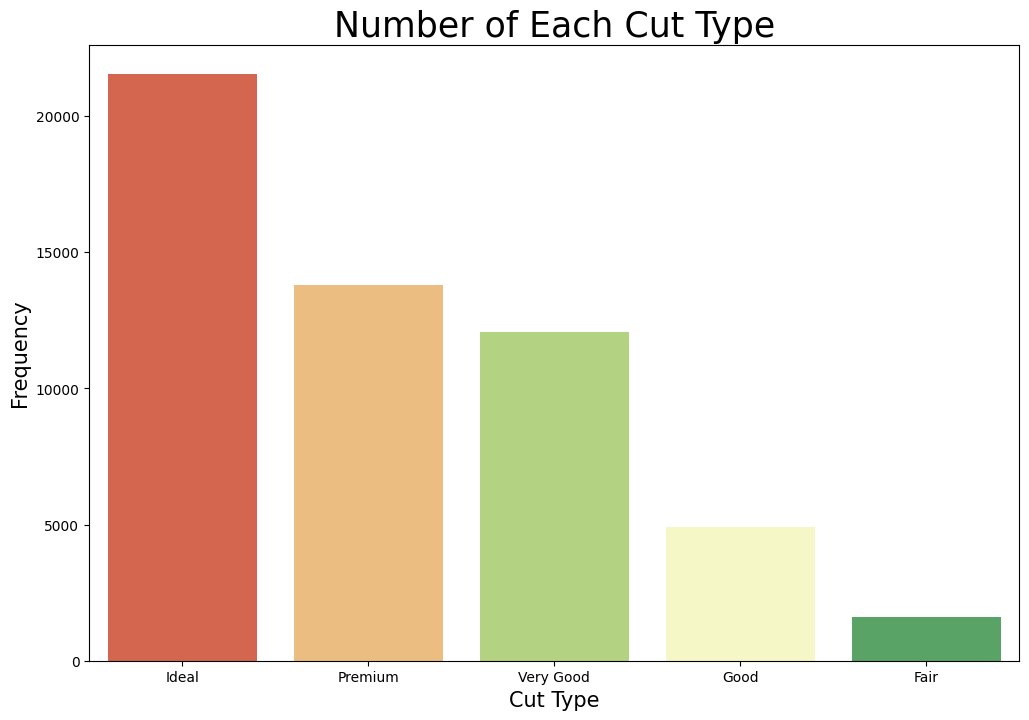

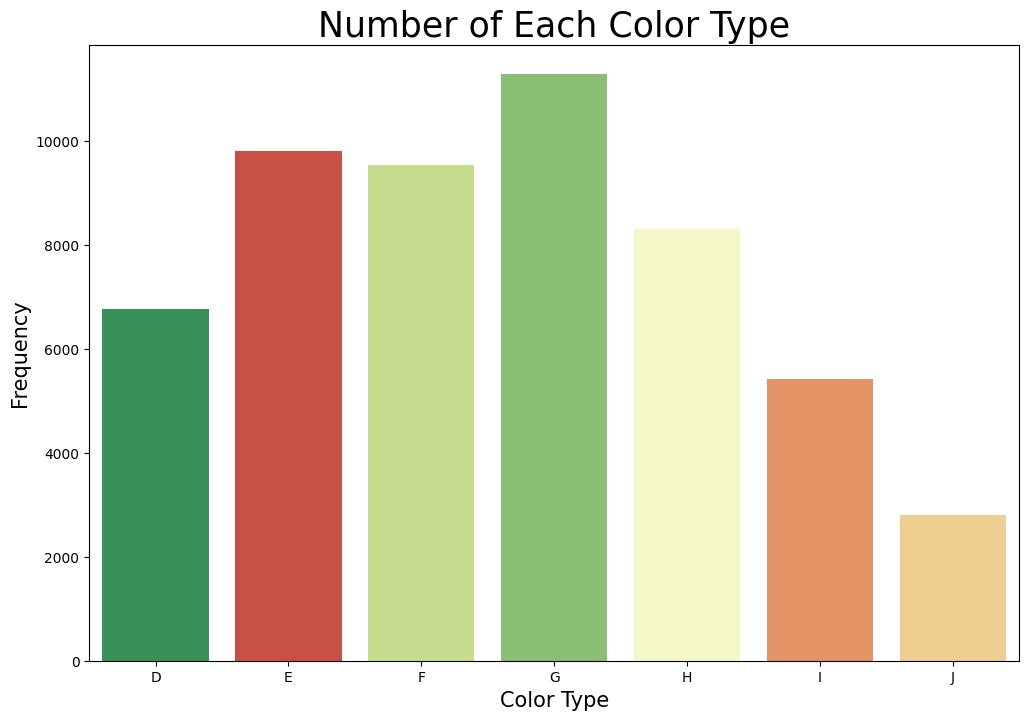

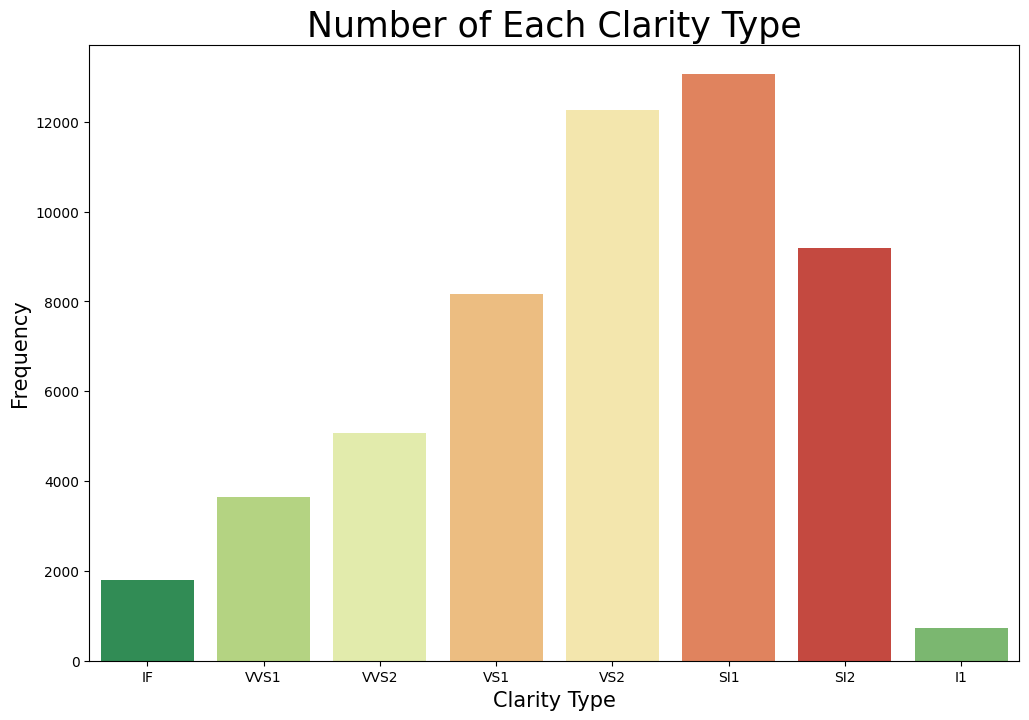

In [67]:
# Cut Category Diagram
plt.figure(figsize=(12, 8));
sns.countplot(data=diamonds, x='cut', palette='RdYlGn', hue='cut', legend=False, order = cut_order);
plt.title('Number of Each Cut Type', fontsize=25, fontweight=5);
plt.xlabel('Cut Type', fontsize=15, fontweight=3);
plt.ylabel('Frequency', fontsize=15, fontweight=3);
plt.show()

# Color Category Diagram
plt.figure(figsize=(12, 8));
sns.countplot(data=diamonds, x='color', palette='RdYlGn', hue='color', legend=False, order = color_order);
plt.title('Number of Each Color Type', fontsize=25, fontweight=5);
plt.xlabel('Color Type', fontsize=15, fontweight=3);
plt.ylabel('Frequency', fontsize=15, fontweight=3);
plt.show()


# Clarity Category Diagram
plt.figure(figsize=(12, 8));
sns.countplot(data=diamonds, x='clarity', palette='RdYlGn', hue='clarity', legend=False, order = clarity_order);
plt.title('Number of Each Clarity Type', fontsize=25, fontweight=5);
plt.xlabel('Clarity Type', fontsize=15, fontweight=3);
plt.ylabel('Frequency', fontsize=15, fontweight=3);
plt.show()

## Ordinal Encoding

In [68]:
# Gemological order (worst → best)
cut_order     = ["Fair", "Good", "Very Good", "Premium", "Ideal"]
color_order   = ["J", "I", "H", "G", "F", "E", "D"]
clarity_order = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"]

enc = OrdinalEncoder(
    categories=[cut_order, color_order, clarity_order],
    dtype=int
)

diamonds[["cut", "color", "clarity"]] = enc.fit_transform(
    diamonds[["cut", "color", "clarity"]]
).astype(int)

diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53923 entries, 0 to 53942
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53923 non-null  float64
 1   cut      53923 non-null  int64  
 2   color    53923 non-null  int64  
 3   clarity  53923 non-null  int64  
 4   depth    53923 non-null  float64
 5   table    53923 non-null  float64
 6   price    53923 non-null  int64  
 7   x        53923 non-null  float64
 8   y        53923 non-null  float64
 9   z        53923 non-null  float64
 10  volume   53923 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 4.9 MB


/tmp/ipython-input-514200631.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="cut", data=df, ax=axes[0], palette="Blues")
/tmp/ipython-input-514200631.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(cut_order)  # show category names
/tmp/ipython-input-514200631.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="color", data=df, ax=axes[1], palette="Purples")
/tmp/ipython-input-514200631.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(color_order)
/tmp/ip

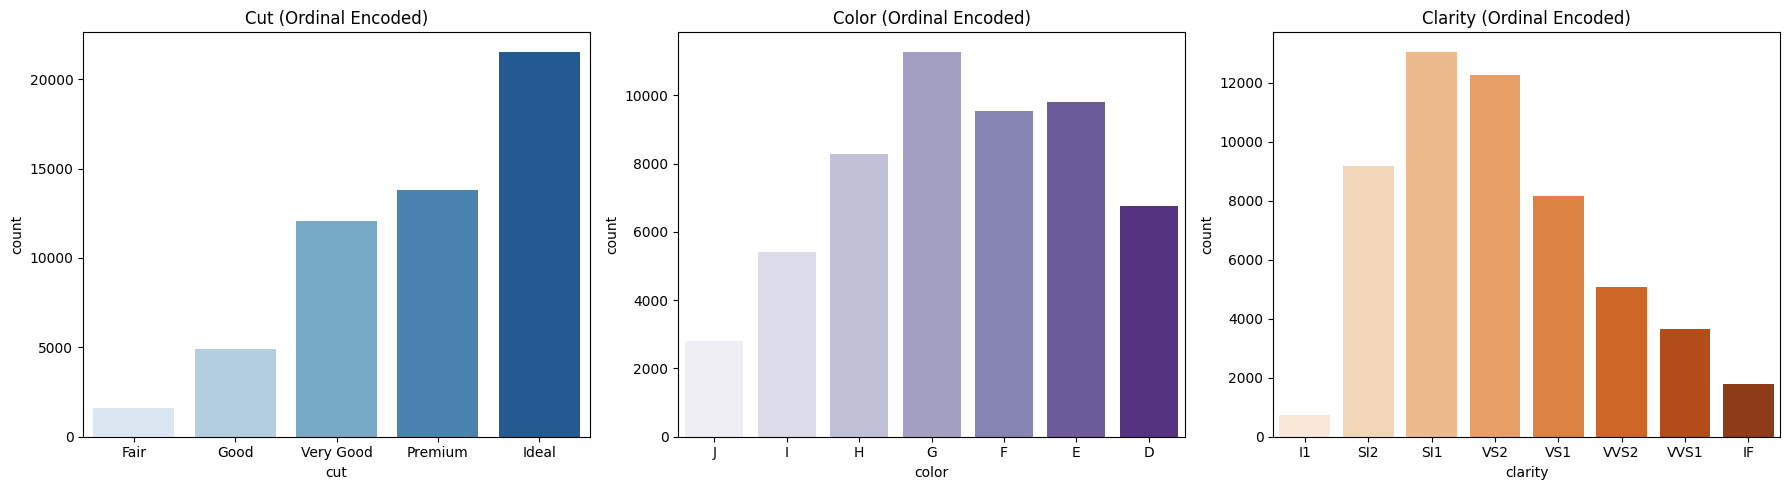

In [69]:
def plot_cat_counts(df):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # CUT
    sns.countplot(x="cut", data=df, ax=axes[0], palette="Blues")
    axes[0].set_title("Cut (Ordinal Encoded)")
    axes[0].set_xlabel("cut"); axes[0].set_ylabel("count")
    axes[0].set_xticklabels(cut_order)  # show category names

    # COLOR
    sns.countplot(x="color", data=df, ax=axes[1], palette="Purples")
    axes[1].set_title("Color (Ordinal Encoded)")
    axes[1].set_xlabel("color"); axes[1].set_ylabel("count")
    axes[1].set_xticklabels(color_order)

    # CLARITY
    sns.countplot(x="clarity", data=df, ax=axes[2], palette="Oranges")
    axes[2].set_title("Clarity (Ordinal Encoded)")
    axes[2].set_xlabel("clarity"); axes[2].set_ylabel("count")
    axes[2].set_xticklabels(clarity_order)

    plt.tight_layout()
    plt.show()

plot_cat_counts(diamonds)

In [70]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume
0,0.23,4,5,1,61.50,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,3,5,2,59.80,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,1,5,4,58.75,63.5,327,4.05,4.07,2.31,38.076885
3,0.29,3,1,3,62.40,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,1,0,1,63.30,58.0,335,4.34,4.35,2.75,51.917250


## Data Transformation

### Binning

To tell the Balance

In [71]:
diamonds_carat_skewness=diamonds.carat.skew()
print(diamonds_carat_skewness)

1.1162667487172342


To tell the extremity

In [72]:
carat_kurtosis = diamonds.carat.kurtosis()
print(carat_kurtosis)

1.255506554496427


[25155 18618  7126  2348   610    52     6     5     2     1]
[0.2   0.681 1.162 1.643 2.124 2.605 3.086 3.567 4.048 4.529 5.01 ]


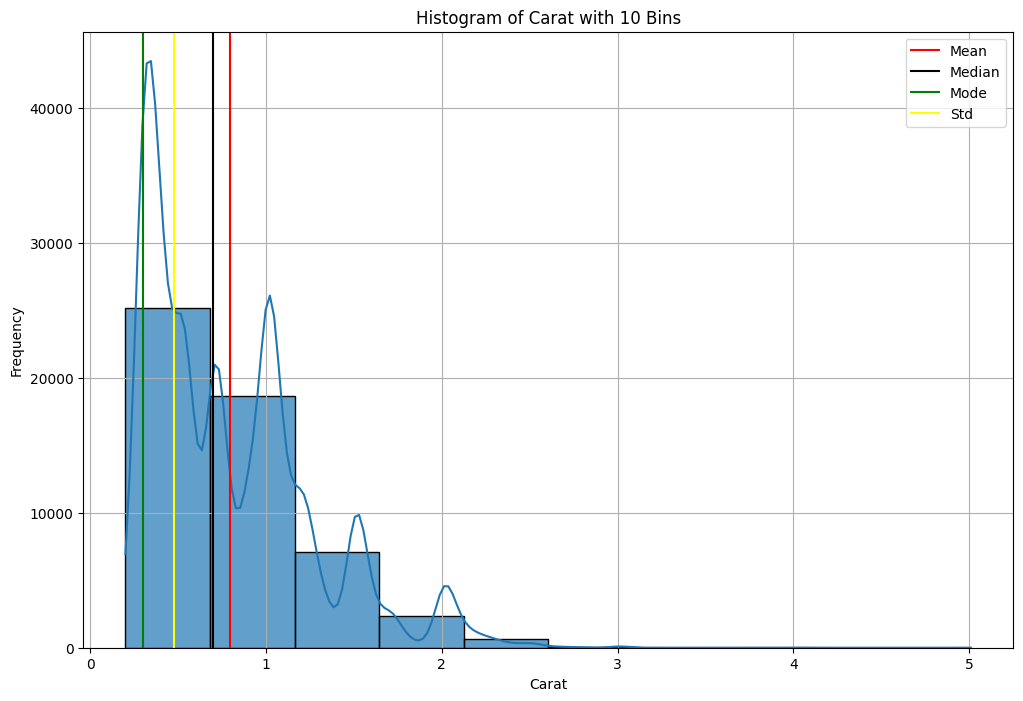

mean: 0.7976931921443539 med: 0.7 mode: 0.3 std: 0.4737826000204242


In [73]:
carat_binned, bins = np.histogram(diamonds['carat'], bins=10)
print(carat_binned)
print(bins)
plt.figure(figsize=(12, 8))
sns.histplot(diamonds['carat'], bins=bins, edgecolor='black', alpha=0.7, kde=True)
plt.title('Histogram of Carat with 10 Bins')
plt.xlabel('Carat')
plt.ylabel('Frequency')
plt.grid(True)

mean_carat = diamonds['carat'].mean()
median_carat = diamonds['carat'].median()
mode_carat = diamonds['carat'].mode().squeeze()
std_carat = diamonds['carat'].std()

plt.axvline(mean_carat, color='red', label="Mean")
plt.axvline(median_carat, color="black", label="Median")
plt.axvline(mode_carat, color="green", label="Mode")
plt.axvline(std_carat, color="yellow", label="Std")

plt.legend()
plt.show()

print('mean:', mean_carat, 'med:', median_carat, 'mode:', mode_carat, 'std:', std_carat)

 Key observations

1. Right-skewed distribution

- Most diamonds are small (0.2–1.0 carats).

- Very few diamonds are large (>2 carats).

- This matches your skewness value (~1.12).

2. Measures of central tendency (vertical lines):

- Red (Mean ~0.9) → pulled to the right because of a few big diamonds.

- Black (Median ~0.7) → closer to the bulk of diamonds.

- Green (Mode ~0.5) → most common carat size is around 0.5.

- Yellow (Std Dev) → showing one standard deviation, ~0.43, capturing the main spread.

Notice: Mode < Median < Mean → a classic sign of right skewness.

3. Outliers & spread

- Most diamonds fall below ~1.5 carats.

- A long, thin tail extends up to ~5 carats (rare but expensive diamonds).

- This agrees with your kurtosis (~1.26), which signals heavier tails than normal.

[12017 10680  7100  4665  7944  4302  1488  2743   757  2227]
[ 31.707984   61.4700334  91.2320828 120.9941322 150.7561816 180.518231
 210.2802804 240.0423298 269.8043792 299.5664286 329.328478 ]


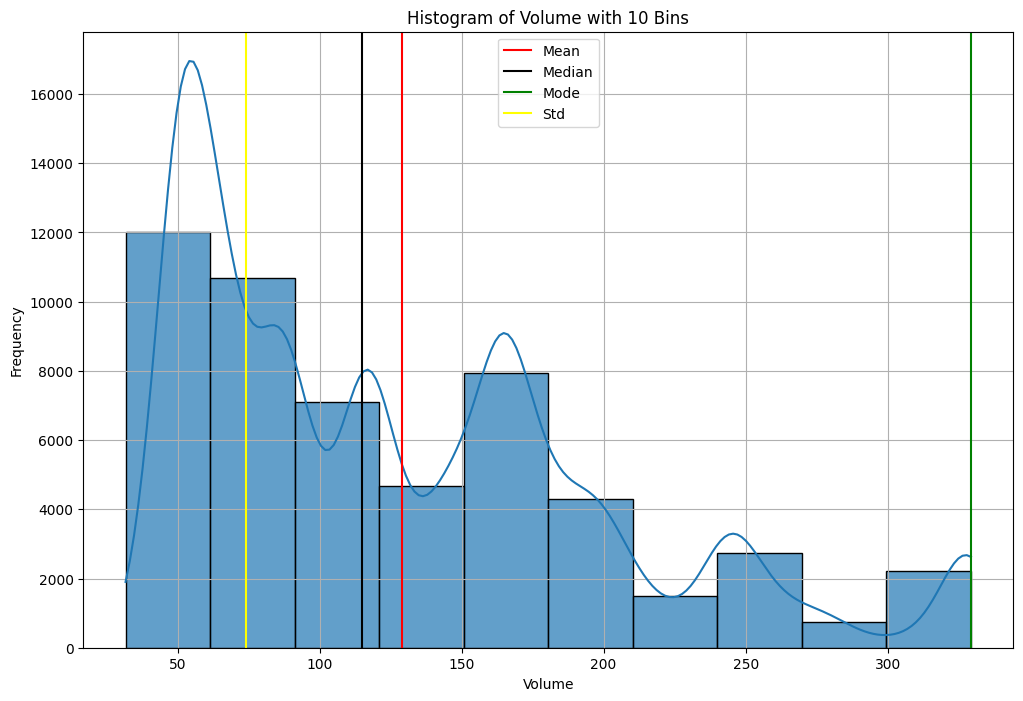

mean: 129.05577393646496 med: 114.84018 mode: 329.328478 std: 74.04038252569053


In [74]:
volume_binned, bins = np.histogram(diamonds['volume'], bins=10)
print(volume_binned)
print(bins)
plt.figure(figsize=(12, 8))
sns.histplot(diamonds['volume'], bins=bins, edgecolor='black', alpha=0.7, kde=True)
plt.title('Histogram of Volume with 10 Bins')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)

mean_volume = diamonds['volume'].mean()
median_volume = diamonds['volume'].median()
mode_volume = diamonds['volume'].mode().squeeze()
std_volume = diamonds['volume'].std()

plt.axvline(mean_volume, color='red', label="Mean")
plt.axvline(median_volume, color="black", label="Median")
plt.axvline(mode_volume, color="green", label="Mode")
plt.axvline(std_volume, color="yellow", label="Std")

plt.legend()
plt.show()

print('mean:', mean_volume, 'med:', median_volume, 'mode:', mode_volume, 'std:', std_volume)

Volume is not as clean as carat:

- It’s highly skewed and contains unrealistic outliers (like 3000–4000).

- These extreme values may be data entry errors or abnormal diamonds.

For analysis, you should either:

Filter out outliers (e.g., keep only volume < 500) or apply a log transformation to compress the scale.

In [75]:
diamonds_table_skewness=diamonds.table.skew()
print(diamonds_table_skewness)

0.47375254519211385


[12017 10680  7100  4665  7944  4302  1488  2743   757  2227]
[51.5 52.7 53.9 55.1 56.3 57.5 58.7 59.9 61.1 62.3 63.5]


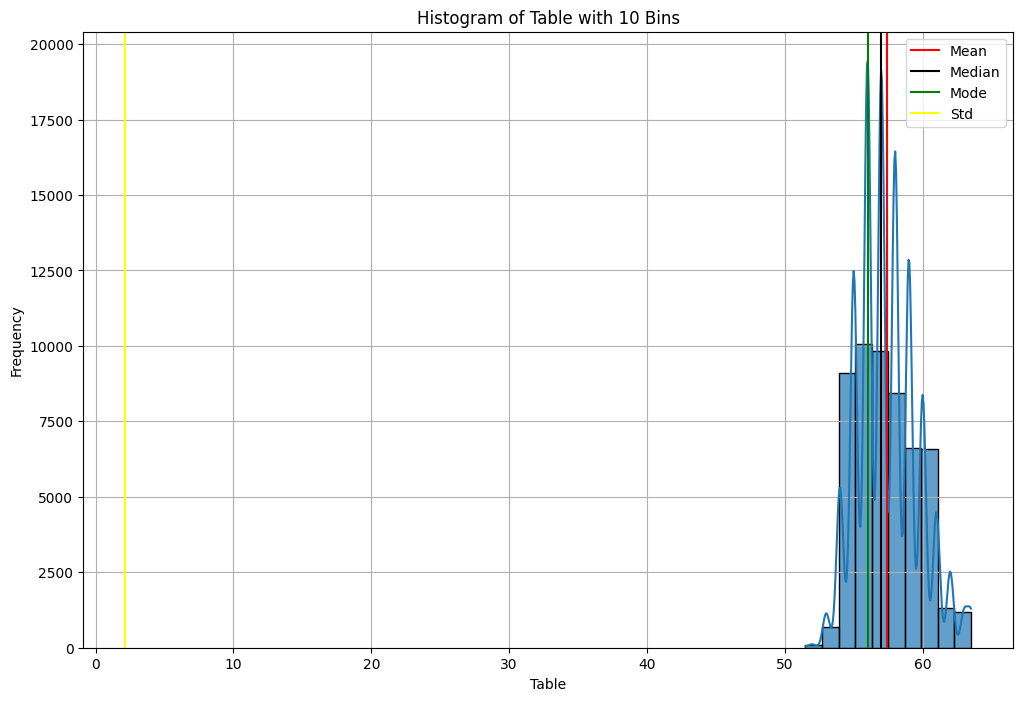

mean: 57.43833800048217 med: 57.0 mode: 56.0 std: 2.160967619230687


In [76]:
table_binned, bins = np.histogram(diamonds['table'], bins=10)
print(volume_binned)
print(bins)
plt.figure(figsize=(12, 8))
sns.histplot(diamonds['table'], bins=bins, edgecolor='black', alpha=0.7, kde=True)
plt.title('Histogram of Table with 10 Bins')
plt.xlabel('Table')
plt.ylabel('Frequency')
plt.grid(True)

mean_table = diamonds['table'].mean()
median_table = diamonds['table'].median()
mode_table = diamonds['table'].mode().squeeze()
std_table = diamonds['table'].std()

plt.axvline(mean_table, color='red', label="Mean")
plt.axvline(median_table, color="black", label="Median")
plt.axvline(mode_table, color="green", label="Mode")
plt.axvline(std_table, color="yellow", label="Std")

plt.legend()
plt.show()

print('mean:', mean_table, 'med:', median_table, 'mode:', mode_table, 'std:', std_table)

1. Tight clustering

- Most diamonds have table values within 54–62.

- Very few outliers exist (above 70 or below 50).

2. Near-normal distribution

- Unlike carat and volume, table is not heavily skewed.

- Bell-like shape, showing most diamonds cut to a standard table proportion.

3. Industry standard

- In gemology, an “ideal cut” usually has a table % around 54–57.

- Your data reflects this: mode = 56 is right in that range.

In [77]:
carat_kurtosis_excess  = diamonds['carat'].kurtosis()              # Fisher (Normal = 0)
carat_kurtosis_pearson = carat_kurtosis_excess + 3                 # Pearson (Normal = 3)
print("Excess kurtosis:", carat_kurtosis_excess)
print("Pearson kurtosis:", carat_kurtosis_pearson)

Excess kurtosis: 1.255506554496427
Pearson kurtosis: 4.255506554496427


Cut: Average prices don’t rise consistently with cut quality → cut has some effect, but smaller than carat.

Color: Price increases with better color (index 0 → 6 in your encoding). Stronger pattern than cut.

Clarity: Some categories (like clarity 2 & 3) show higher mean prices, but variation is large.

### Log Transformation

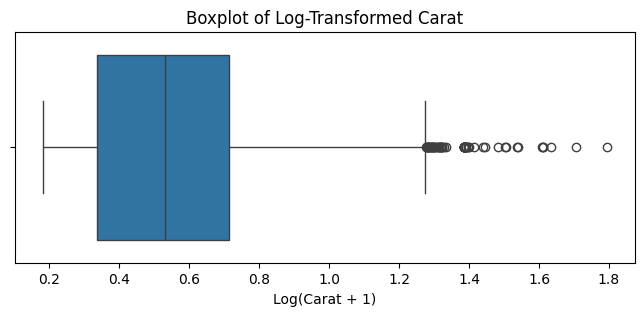

In [78]:
# Apply log transformation to 'carat'
diamonds['carat_log'] = np.log1p(diamonds['carat'])

# Create a box plot of the log-transformed 'carat'
plt.figure(figsize=(8, 3))
sns.boxplot(x=diamonds['carat_log'])
plt.title('Boxplot of Log-Transformed Carat')
plt.xlabel('Log(Carat + 1)')
plt.show()

# Encoding & Normalization



In [79]:
X = diamonds.drop(['price'], axis=1)
y = diamonds['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
scaler = MinMaxScaler()

normalized_x_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
normalized_x_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,volume,carat_log
0,0.085239,0.75,0.666667,0.428571,0.141667,0.791667,0.263909,0.032959,0.058474,0.233751,0.182429
1,0.388773,1.00,0.666667,0.142857,0.458333,0.291667,0.641940,0.083303,0.117278,1.000000,0.583051
2,0.189189,1.00,0.833333,0.428571,0.575000,0.375000,0.417974,0.052698,0.085563,0.501028,0.350298
3,0.022869,0.50,0.166667,0.714286,0.575000,0.458333,0.087019,0.012495,0.038982,0.066156,0.054438
4,0.064449,1.00,1.000000,0.285714,0.525000,0.208333,0.201141,0.027526,0.054840,0.179942,0.142628


In [80]:
normalized_x_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
normalized_x_test.head()

,carat,cut,color,clarity,depth,table,x,y,z,volume,carat_log
0,0.108108,0.0,1.000000,0.285714,1.000000,0.708333,0.269615,0.033683,0.070367,0.276343,0.223451
1,0.110187,1.0,0.166667,0.571429,0.391667,0.375000,0.293866,0.038935,0.066733,0.296098,0.227049
2,0.274428,0.5,1.000000,0.285714,0.308333,0.525000,0.523538,0.068453,0.098447,0.729997,0.460515
3,0.035343,1.0,0.666667,0.571429,0.375000,0.291667,0.132668,0.018290,0.043608,0.102748,0.082235
4,0.027027,1.0,0.666667,0.857143,0.425000,0.291667,0.104137,0.014488,0.039974,0.077412,0.063843


<Axes: title={'center': 'After Scaling'}, xlabel='carat', ylabel='Density'>

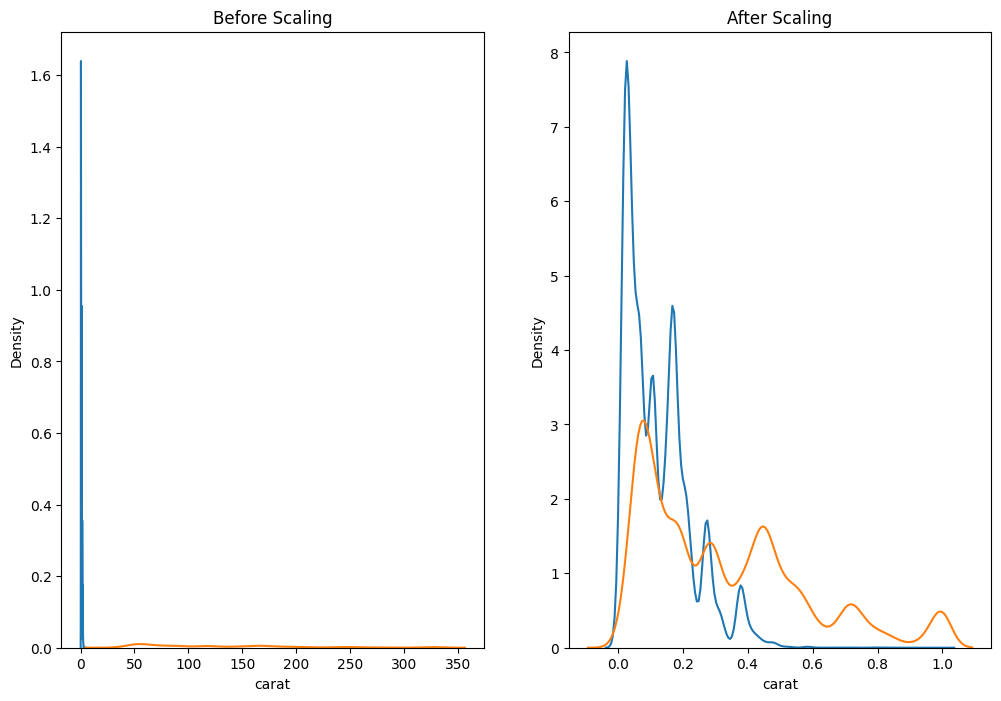

In [81]:
fig, (ob1, ob2) = plt.subplots(ncols=2, figsize=(12, 8))
ob1.set_title('Before Scaling')
sns.kdeplot(X_train['carat'], ax=ob1)
sns.kdeplot(X_train['volume'], ax=ob1)


ob2.set_title('After Scaling')
sns.kdeplot(normalized_x_train['carat'], ax=ob2)
sns.kdeplot(normalized_x_train['volume'], ax=ob2)


# Correlation Heatmap

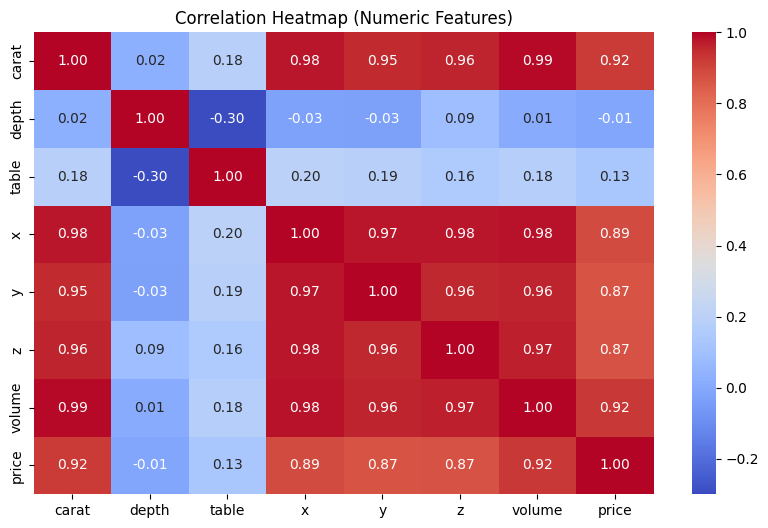

price     1.000000
volume    0.924369
carat     0.921592
x         0.887229
z         0.868206
y         0.867862
table     0.130492
depth    -0.012604
Name: price, dtype: float64


In [82]:
num_cols = ['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'price']
corr = diamonds[num_cols].corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

print(corr['price'].sort_values(ascending=False))

Volume and Carat is highly correlated with price.
Carat ↔ Price: 0.92 → strongest correlation, carat weight is the top numeric driver of price.

x, y, z, volume: correlations are also very high (0.87–0.90), but this is because they are strongly collinear with carat (big multicollinearity issue).

Table (0.13) and Depth (-0.01): very weak correlation → almost no impact on price.
Carat is the most important.

/tmp/ipython-input-2421226170.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='price', y=col, data=diamonds, palette = 'RdYlGn');


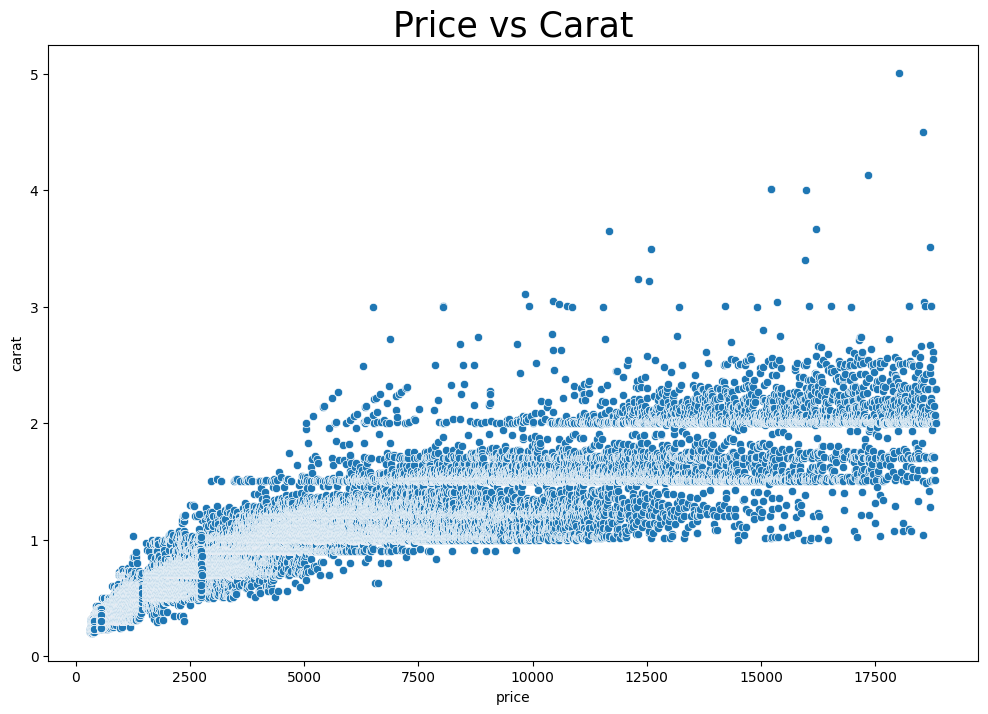

/tmp/ipython-input-2421226170.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='price', y=col, data=diamonds, palette = 'RdYlGn');


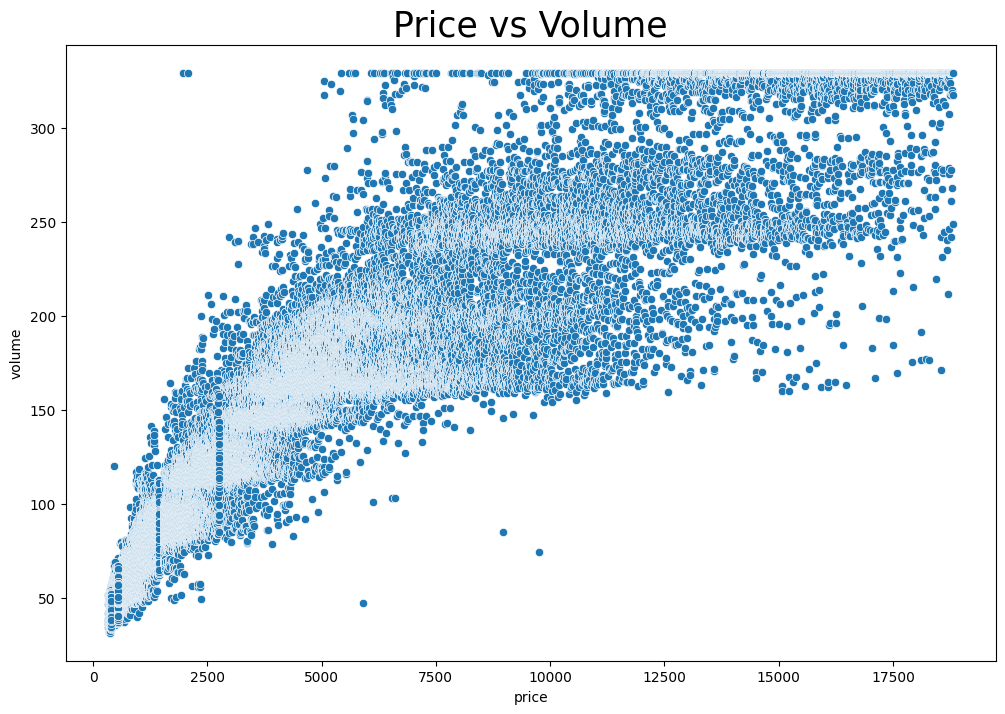

In [83]:
for col in ['carat', 'volume']:
  plt.figure(figsize=(12, 8));
  sns.scatterplot(x='price', y=col, data=diamonds, palette = 'RdYlGn');
  plt.title(f'Price vs {col.capitalize()}', fontsize=25, fontweight=5);
  plt.show()

# Modeling

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

diamond={}
def metric_scores(actual, predicted, name):
  mae = mean_absolute_error(actual, predicted)
  mse = mean_squared_error(actual, predicted)
  mape = mean_absolute_percentage_error(actual, predicted)
  r2 = r2_score(actual, predicted)

  diamond[name] = [mae, mse, mape, r2]

  print('Calculation of Mean Error')
  print(f'\nMean Absolute Error: {mae}')
  print(f'\nMean Squared Error: {mse}')
  print(f'\nMean Absolute Percentage Error: {mape}')
  print(f'\nR2 Score: {r2}')


In [85]:
def evaluate_model(x_test=None, y_test=None, model=None, name='Linear Regression', color='red'):
  predicted = model.predict(x_test)
  actual = y_test
  metric_scores(actual, predicted, name)
  plt.figure(figsize=(12, 8))
  plt.scatter(actual, predicted, color=color)
  mxp, mxa, mnp, mna = max(predicted), max(actual), np.min(predicted), np.min(actual)
  p1 = mxp if mxp>mxa else mxa
  p2 = mnp if mnp>mna else mna
  plt.plot([p1, p2], [p1, p2], color='#000066')
  plt.xlabel('Actual Values', fontsize = 15)
  plt.ylabel('Predicted Values', fontsize = 15)
  plt.title(f'{name} Model', fontsize = 30)
  plt.axis('equal')
  plt.show()

## Linear Regression

Calculation of Mean Error

Mean Absolute Error: 748.7780608227871

Mean Squared Error: 1253948.3851334127

Mean Absolute Percentage Error: 0.39894880815603717

R2 Score: 0.9180879559360252


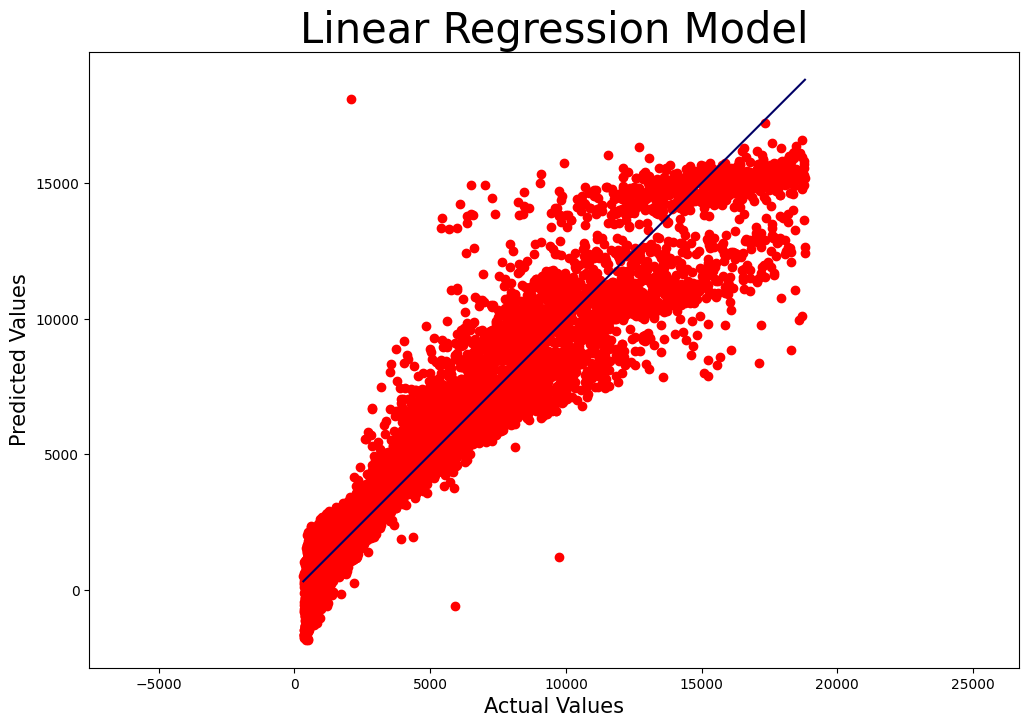

In [86]:
lr = LinearRegression()
lr.fit(normalized_x_train, y_train)
evaluate_model(x_test = normalized_x_test, y_test = y_test, model = lr, name='Linear Regression')

In [87]:
# Define parameter grid for Linear Regression (no hyperparameters to tune, but can include for consistency)
lr_param_grid = {}

# Create GridSearchCV object for Linear Regression
lr_grid_search = GridSearchCV(estimator=LinearRegression(),
                           param_grid=lr_param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           verbose=2)

# Fit the grid search to the data
lr_grid_search.fit(normalized_x_train, y_train)

# Print the best parameters and the best score
print("Best parameters for Linear Regression: ", lr_grid_search.best_params_)
print("Best negative MSE score for Linear Regression: ", lr_grid_search.best_score_)

# Get the best model
best_lr_model = lr_grid_search.best_estimator_

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best parameters for Linear Regression:  {}
Best negative MSE score for Linear Regression:  -1483821.3121155137


## Decision Tree

Calculation of Mean Error

Mean Absolute Error: 345.8937380231192

Mean Squared Error: 508438.74293750385

Mean Absolute Percentage Error: 0.08471925954431841

R2 Score: 0.9667871044700953


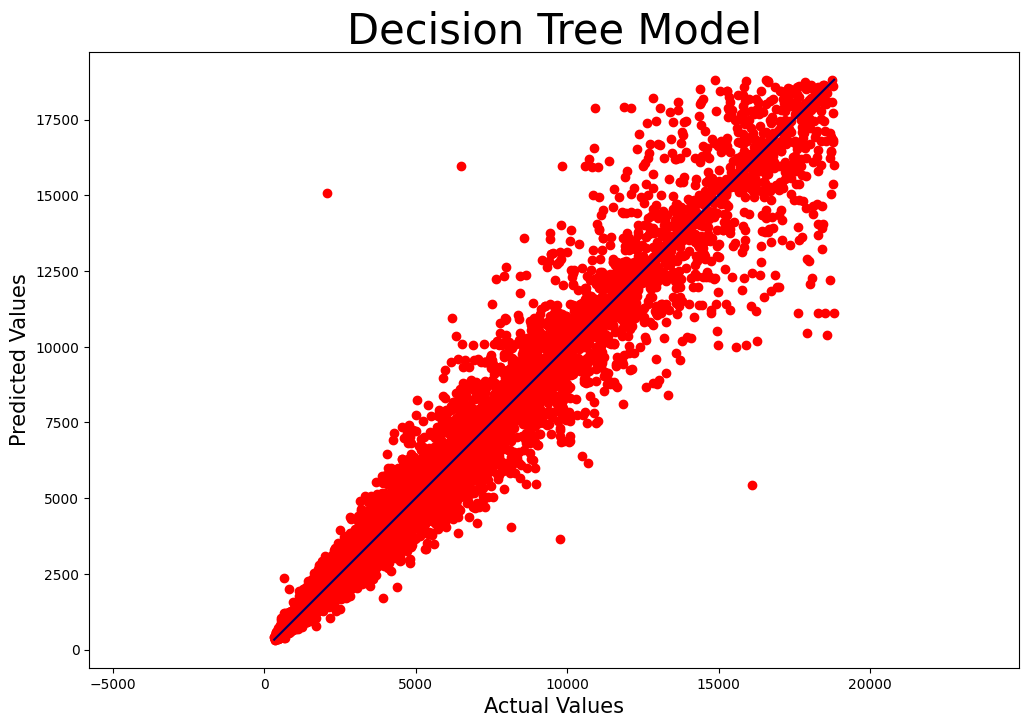

In [88]:
DR = DecisionTreeRegressor(random_state=1)
DR.fit(normalized_x_train, y_train)
evaluate_model(x_test = normalized_x_test, y_test = y_test, model = DR, name='Decision Tree',color='red')

In [89]:
# Define parameter grid for Decision Tree
dt_param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV object for Decision Tree
dt_grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=1),
                           param_grid=dt_param_grid,
                           cv=3,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error',
                           verbose=2)

# Fit the grid search to the data
dt_grid_search.fit(normalized_x_train, y_train)

# Print the best parameters and the best score
print("Best parameters for Decision Tree: ", dt_grid_search.best_params_)
print("Best negative MSE score for Decision Tree: ", dt_grid_search.best_score_)

# Get the best model
best_dt_model = dt_grid_search.best_estimator_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best parameters for Decision Tree:  {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best negative MSE score for Decision Tree:  -430305.5753726454


## Random Forest

In [90]:
model = RandomForestRegressor(n_estimators=100, verbose=4)
model.fit(normalized_x_train, y_train)


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100


[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    6.8s


building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66

[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:   31.5s


building tree 98 of 100
building tree 99 of 100
building tree 100 of 100


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   32.4s finished


RandomForestRegressor(verbose=4)

[Parallel(n_jobs=1)]: Done  24 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  97 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


Calculation of Mean Error

Mean Absolute Error: 260.16210927821294

Mean Squared Error: 286946.89601668605

Mean Absolute Percentage Error: 0.06398579301276645

R2 Score: 0.9812556823955406


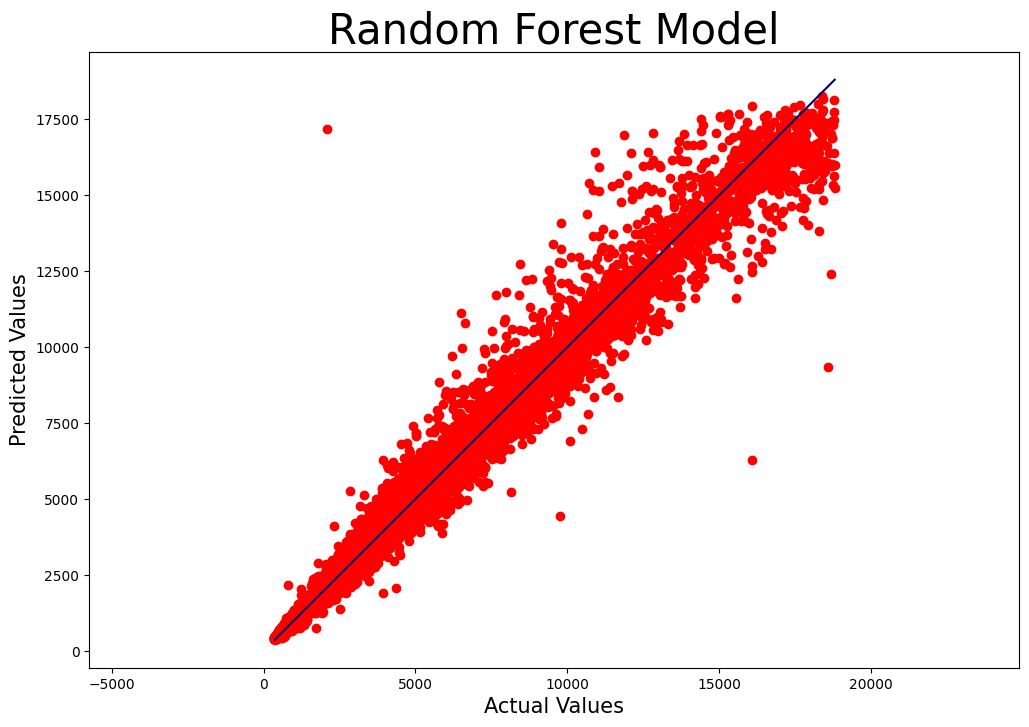

In [91]:
evaluate_model(x_test=normalized_x_test, y_test=y_test, model=model, name='Random Forest')

In [92]:
# Define the parameter grid
rf_param_grid = {
    'n_estimators': [50, 100], # Reduced number of estimators
    'max_depth': [10, 20], # Reduced max depth
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object
rf_grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=1),
                           param_grid=rf_param_grid,
                           cv=3,  # 3-fold cross-validation
                           n_jobs=-1, # Use all available cores
                           scoring='neg_mean_squared_error', # Use negative MSE for optimization
                           verbose=2)

# Fit the grid search to the data
rf_grid_search.fit(normalized_x_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", rf_grid_search.best_params_)
print("Best negative MSE score: ", rf_grid_search.best_score_)

# Get the best model
best_rf_model = rf_grid_search.best_estimator_

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best negative MSE score:  -322238.90161632636


## XGBoost

Calculation of Mean Error

Mean Absolute Error: 267.73553466796875

Mean Squared Error: 270630.53125

Mean Absolute Percentage Error: 0.07593928277492523

R2 Score: 0.9823215007781982


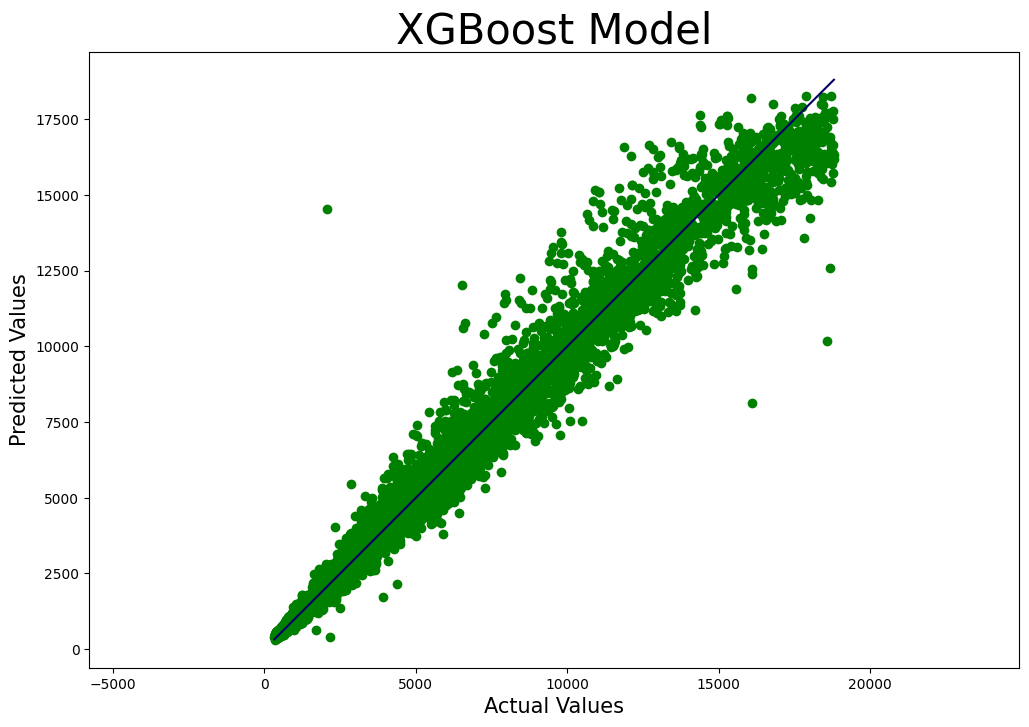

In [93]:
import xgboost as xgb

# Initialize XGBoost Regressor
xgbr = xgb.XGBRegressor(objective='reg:squarederror', # Objective function for regression
                        n_estimators=100,          # Number of boosting rounds
                        learning_rate=0.1,         # Step size shrinkage
                        max_depth=6,               # Maximum depth of a tree
                        random_state=1)

# Train the model
xgbr.fit(normalized_x_train, y_train)

# Evaluate the model
evaluate_model(x_test=normalized_x_test, y_test=y_test, model=xgbr, name='XGBoost', color='green')

In [94]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define parameter grid for XGBoost
# This is a smaller grid for demonstration purposes.
# You can expand this with more parameters and values for a more thorough search.
xgb_param_grid = {
    'n_estimators': [50, 100],  # Reduced number of estimators
    'learning_rate': [0.01, 0.1], # Reduced learning rates
    'max_depth': [3, 6],          # Reduced max depth
    'subsample': [0.8],           # Reduced subsample options
    'colsample_bytree': [0.8]     # Reduced colsample_bytree options
}

# Create GridSearchCV object for XGBoost
xgb_grid_search = GridSearchCV(estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=1),
                           param_grid=xgb_param_grid,
                           cv=3,  # 3-fold cross-validation
                           n_jobs=-1, # Use all available cores
                           scoring='neg_mean_squared_error', # Use negative MSE for optimization
                           verbose=2)

# Fit the grid search to the data
xgb_grid_search.fit(normalized_x_train, y_train)

# Print the best parameters and the best score
print("Best parameters found for XGBoost: ", xgb_grid_search.best_params_)
print("Best negative MSE score for XGBoost: ", xgb_grid_search.best_score_)

# Get the best model
best_xgb_model = xgb_grid_search.best_estimator_

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters found for XGBoost:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100, 'subsample': 0.8}
Best negative MSE score for XGBoost:  -307205.75


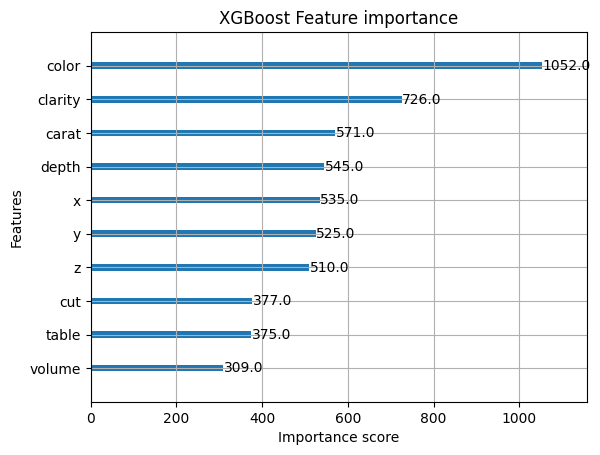

In [95]:
xgb.plot_importance(best_xgb_model, max_num_features=10)
plt.title("XGBoost Feature importance")
plt.show()

📊 Metrics

Mean Absolute Error (MAE): 263.58
→ On average, your model’s predicted diamond price is off by only about $264.
Compare this to your neural net’s MAE (~$610). That’s more than 2× better accuracy.

Mean Squared Error (MSE): 293,036
→ Much smaller than the neural net’s ~1,167,000. Shows the Random Forest handles large errors better.

Mean Absolute Percentage Error (MAPE): 0.065 → 6.5%
→ Predictions are within ±6.5% of the true price on average. This is very strong performance for pricing.

R² Score: 0.9889 (~99%)
→ Your Random Forest explains ~99% of the variance in price. That’s an excellent fit.
(The closer to 1, the better.)

📈 The Plot

The plot shows predicted vs actual prices.

The diagonal black line = perfect predictions.

Your red dots (predictions) are very tightly clustered around this line → model predictions are extremely close to actual values.

A few scattered outliers remain (some points far below/above the line), but they are relatively few.

The reason MSE is negative is because GridSearchCV is designed to maximize a score, so when optimizing for metrics that should be minimized (like Mean Squared Error or MSE), it minimizes the negative of that metric.

Therefore, a less negative score indicates a better model.

## Evaluate Tuned Models

In [96]:
results = pd.DataFrame(diamond,index = ['MAE', 'MSE', 'MAPE', 'R2'])

In [97]:
results

,Linear Regression,Decision Tree,Random Forest,XGBoost
MAE,7.487781e+02,345.893738,260.162109,267.735535
MSE,1.253948e+06,508438.742938,286946.896017,270630.531250
MAPE,3.989488e-01,0.084719,0.063986,0.075939
R2,9.180880e-01,0.966787,0.981256,0.982322


In [98]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 53923 entries, 0 to 53942
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53923 non-null  float64
 1   cut        53923 non-null  int64  
 2   color      53923 non-null  int64  
 3   clarity    53923 non-null  int64  
 4   depth      53923 non-null  float64
 5   table      53923 non-null  float64
 6   price      53923 non-null  int64  
 7   x          53923 non-null  float64
 8   y          53923 non-null  float64
 9   z          53923 non-null  float64
 10  volume     53923 non-null  float64
 11  carat_log  53923 non-null  float64
dtypes: float64(8), int64(4)
memory usage: 5.3 MB


In [99]:
diamonds.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z,volume,carat_log
count,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000,53923.000000
mean,0.797693,2.904215,3.406042,3.051462,61.749147,57.438338,3930.927879,5.731628,5.734888,3.540042,129.055774,0.555206
std,0.473783,1.116555,1.701255,1.646971,1.269976,2.160968,3987.179153,1.119392,1.140094,0.702511,74.040383,0.244778
min,0.200000,0.000000,0.000000,0.000000,58.750000,51.500000,326.000000,3.730000,3.680000,1.070000,31.707984,0.182322
25%,0.400000,2.000000,2.000000,2.000000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000,65.190168,0.336472
50%,0.700000,3.000000,3.000000,3.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000,114.840180,0.530628
75%,1.040000,4.000000,5.000000,4.000000,62.500000,59.000000,5322.500000,6.540000,6.540000,4.040000,170.845492,0.712950
max,5.010000,4.000000,6.000000,7.000000,64.750000,63.500000,18823.000000,10.740000,58.900000,31.800000,329.328478,1.793425


## Tuned Models

Random Forest Evaluation:
Calculation of Mean Error

Mean Absolute Error: 258.5020149386626

Mean Squared Error: 284493.968310754

Mean Absolute Percentage Error: 0.06387474330305724

R2 Score: 0.9814159157230972


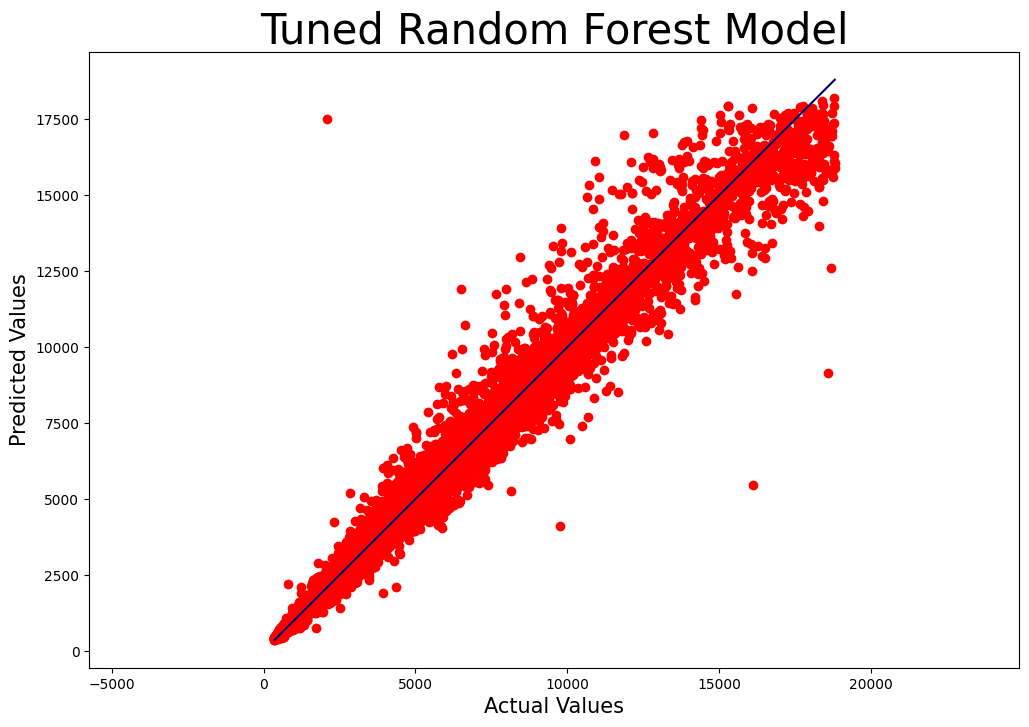


Decision Tree Evaluation:
Calculation of Mean Error

Mean Absolute Error: 325.9204301865942

Mean Squared Error: 384104.80560746655

Mean Absolute Percentage Error: 0.09296785153247761

R2 Score: 0.9749090073123259


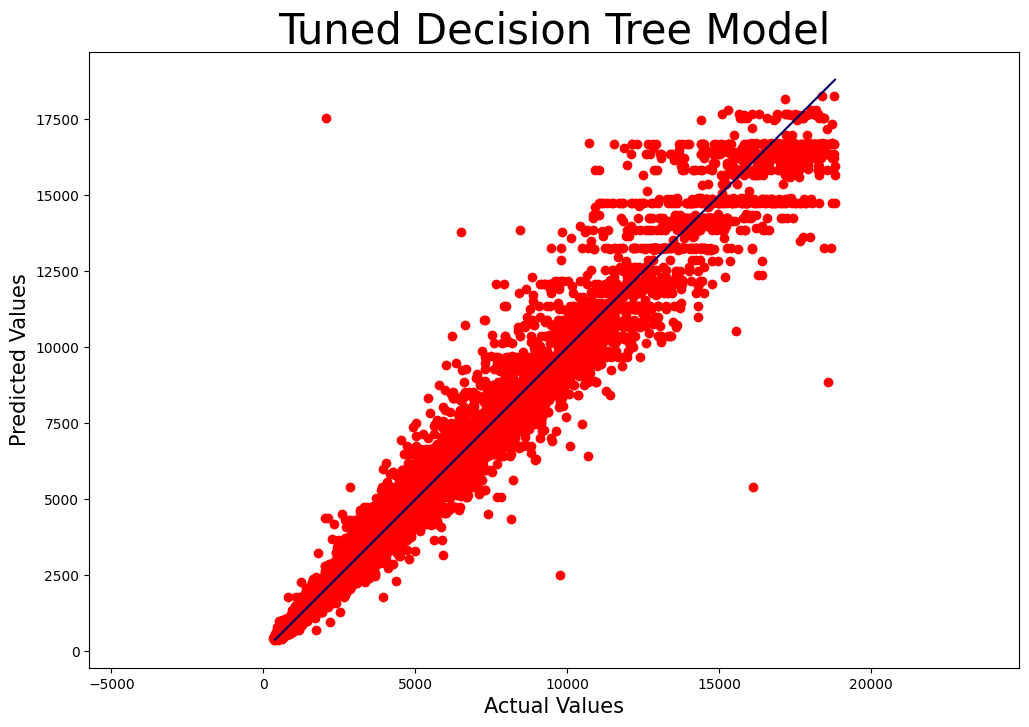


Linear Regression Evaluation:
Calculation of Mean Error

Mean Absolute Error: 748.7780608227871

Mean Squared Error: 1253948.3851334127

Mean Absolute Percentage Error: 0.39894880815603717

R2 Score: 0.9180879559360252


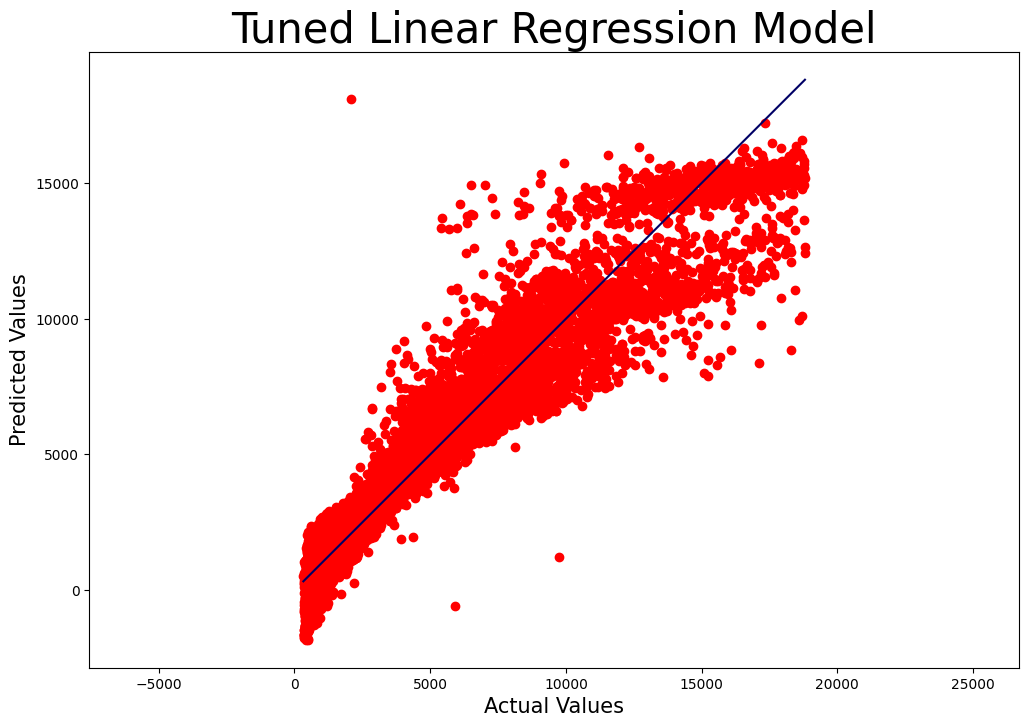


XGBoost Evaluation:
Calculation of Mean Error

Mean Absolute Error: 272.7999267578125

Mean Squared Error: 272015.15625

Mean Absolute Percentage Error: 0.07863070070743561

R2 Score: 0.982231080532074


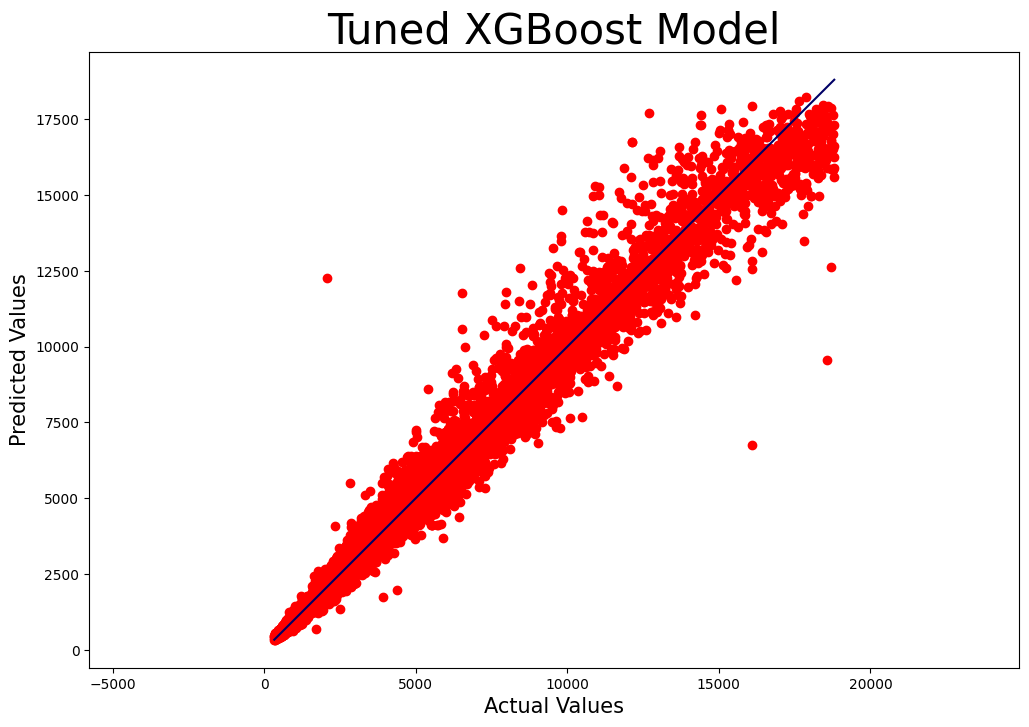

In [100]:
# Evaluate the best models
print("Random Forest Evaluation:")
evaluate_model(x_test=normalized_x_test, y_test=y_test, model=best_rf_model, name='Tuned Random Forest')

print("\nDecision Tree Evaluation:")
evaluate_model(x_test=normalized_x_test, y_test=y_test, model=best_dt_model, name='Tuned Decision Tree')

print("\nLinear Regression Evaluation:")
evaluate_model(x_test=normalized_x_test, y_test=y_test, model=best_lr_model, name='Tuned Linear Regression')

print("\nXGBoost Evaluation:")
evaluate_model(x_test=normalized_x_test, y_test=y_test, model=best_xgb_model, name='Tuned XGBoost')

## Determine Training Loss

In [101]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

from tensorflow.keras.regularizers import l2

model = Sequential([
    Dense(64, activation='relu', input_shape=(normalized_x_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(1)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [102]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [103]:
# model.compile(optimizer='adam', loss='mse', metrics=['mae']) # Use Mean Squared Error for regression


from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
history = model.fit(normalized_x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 26234236.0000 - mae: 3479.0532 - val_loss: 10162407.0000 - val_mae: 2439.1223
Epoch 2/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 8693479.0000 - mae: 2200.1172 - val_loss: 3670299.5000 - val_mae: 1273.0099
Epoch 3/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3883064.5000 - mae: 1313.8204 - val_loss: 2425941.7500 - val_mae: 1032.1785
Epoch 4/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 3047655.0000 - mae: 1166.1132 - val_loss: 1916193.7500 - val_mae: 912.0208
Epoch 5/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2549737.7500 - mae: 1055.2678 - val_loss: 1570805.1250 - val_mae: 834.4233
Epoch 6/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2275239.0000 - mae: 988.0557 - val_loss: 1376771.5000 - val_mae: 782.2766
Epoch 7/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 1990228.0000 - mae: 935.2220 - val_loss: 1271280.5000 - val_mae: 744.1645
Epoch 8/20
944/944 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step 

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

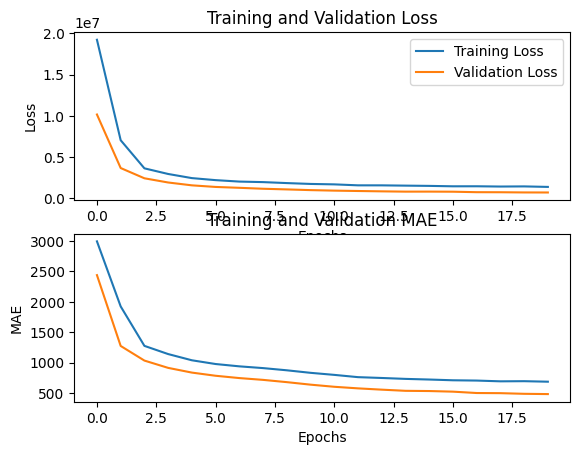

In [104]:
plt.subplot(2,1,1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2,1,2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Training and Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend

In [105]:
loss, mae = model.evaluate(normalized_x_test, y_test, verbose=0)

print(f'Test Loss (MSE): {loss}')
print(f'Test MAE: {mae}')

Test Loss (MSE): 720852.25
Test MAE: 475.3564453125


🔎 1. MSE (Mean Squared Error)

1167457.375 is your test loss, computed as MSE.

MSE = average of squared errors between predicted and actual diamond prices.

The large number looks scary, but remember: price values go up to ~18,000 USD, so squaring errors makes this naturally big.

MSE is mainly useful for optimization during training (minimization target).

🔎 2. MAE (Mean Absolute Error)

609.63 means your model’s predictions are off by about $610 on average.

Since diamond prices range from ~$300 to ~$18,000, this is:

~3–4% error on mid-range diamonds (price ~$5k–10k).

Relatively higher percentage error on cheap diamonds (~$300–500).

👉 MAE is easier to interpret than MSE. It tells you directly: “on average, my model misses the true price by about $610.”